
## Challenge 1
* Do a function to simulate a rolling dice 10 times and save the information in a dataframe.
* Plot the values sorted by value.
* Calculate the frequency distribution and plot it. What is the relation between this plot and the other one? Describe it with words.

In [3]:
import pandas as pd 
import numpy as np 
%matplotlib inline


In [43]:
def rolling_dice():
    array = np.random.randint(1,7, size=10)
    df = pd.DataFrame({'col1' :array})
    return df

In [44]:
roll_dice_df = rolling_dice()

In [84]:
roll_dice_df

,col1
0,6
1,2
2,1
3,5
4,1
5,5
6,3
7,6
8,4
9,4


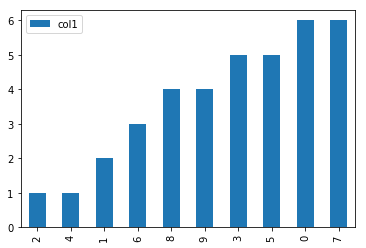

In [46]:
roll_dice_df.sort_values(by = ['col1']).plot(kind='bar')

In [49]:
freq_df = roll_dice_df['col1'].value_counts()

In [51]:
freq_df = pd.DataFrame(data = freq_df)

In [58]:
freq_df = freq_df.sort_index().reset_index().rename(columns= {'index' : 'frequency'})

In [59]:
freq_df

,frequency,col1
0,1,2
1,2,1
2,3,1
3,4,2
4,5,2
5,6,2


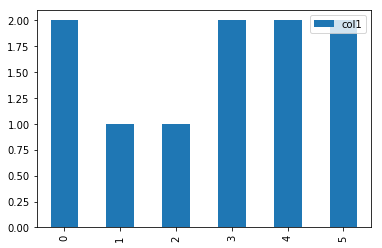

In [65]:
freq_df[['col1']].plot( kind = 'bar')

In the first plot, I ploted 10 columns, each representing one dice roll. On the other hand, in the second, I grouped each result and ploted them by their frequency.

## Challenge 2
With the results of your dice of the challenge 1, define some functions to calculate the mean in two ways:
* Summing all the observations separately (no method allowed!)
* Calculate first the frequency distribution and then the mean with the values of the distribution (no other methods allowed!)
* Define a function to calculate the median. No method allowed!
*Hint: depending on the number of observations you need to define two cases.
* Using your last function, use it to define a function that will calculate the four quartiles.

In [85]:
def mean(df):
    sum_values = 0
    sum_quantity = 0
    for i in df['col1']:
        sum_quantity += 1
        sum_values += i
    return f"The mean in {sum_values/sum_quantity}"

In [86]:
mean(roll_dice_df)

'The mean in 3.7'

In [102]:
def mean_2(df):
    array = np.empty([6]) 
    for count, i in enumerate(df['col1']):
        array[count] = i/10
    dataframe = pd.DataFrame(data= array, columns={'freq'})
    return dataframe
   # return f"The mean in {sum_values/sum_quantity}"

In [103]:
mean_2(freq_df)

,freq
0,0.2
1,0.1
2,0.1
3,0.2
4,0.2
5,0.2


In [111]:
freq_df2 = freq_df.join(mean_2(freq_df))

In [112]:
freq_df2

,frequency,col1,freq
0,1,2,0.2
1,2,1,0.1
2,3,1,0.1
3,4,2,0.2
4,5,2,0.2
5,6,2,0.2


In [116]:
freq_df2['total_freq'] = freq_df2['frequency'] * freq_df2['freq']

In [118]:
freq_df2['total_freq'].sum() 

3.7

In [146]:
def median(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='col1')
    for count, i in enumerate(df['col1']):
        if count == (len(df.index)/2):
            value_up = i
        if count == (len(df.index)/2)-1:
            value_down = i
    return (value_up + value_down)/2

In [147]:
median(roll_dice_df)

4.0

In [164]:
def quartile75(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='col1')
    for count, i in enumerate(df['col1']):
        if count == round(len(df.index)*3/4):
            value_up = i
            print((len(df.index)*3/4), count, value_up)
        if count == round((len(df.index)*3/4)-1):
            value_down = i
            print((len(df.index)*3/4)-1, count, value_down)
    return (value_up + value_down)/2

In [165]:
quartile75(roll_dice_df)

6.5 6 5
7.5 8 6


5.5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv`
* Plot the values sorted. What do you see?
* With the functions you defined in the challenge 2, calculate the mean of the rollings.
* Calculate the frequency distribution.
* Plot the histogram as we did during the lesson. What do you see? (shape, values...) how could you connect the value of the mean to the plot you see? 
* Now read the `roll_the_dice_thousand.csv` and plot the frequency distribution in the same way you did it before.
What has changed? Why do you think it is changing?

In [166]:
roll_hundred = pd.read_csv('roll_the_dice_hundred.csv')

In [167]:
roll_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


I see a frequency distribution.

In [173]:
def mean3(df):
    df['freq'] = df['roll'] * df ['value']
    return df['freq'].sum()/df['value'].sum()

In [174]:
mean3(roll_hundred)

49.29946524064171

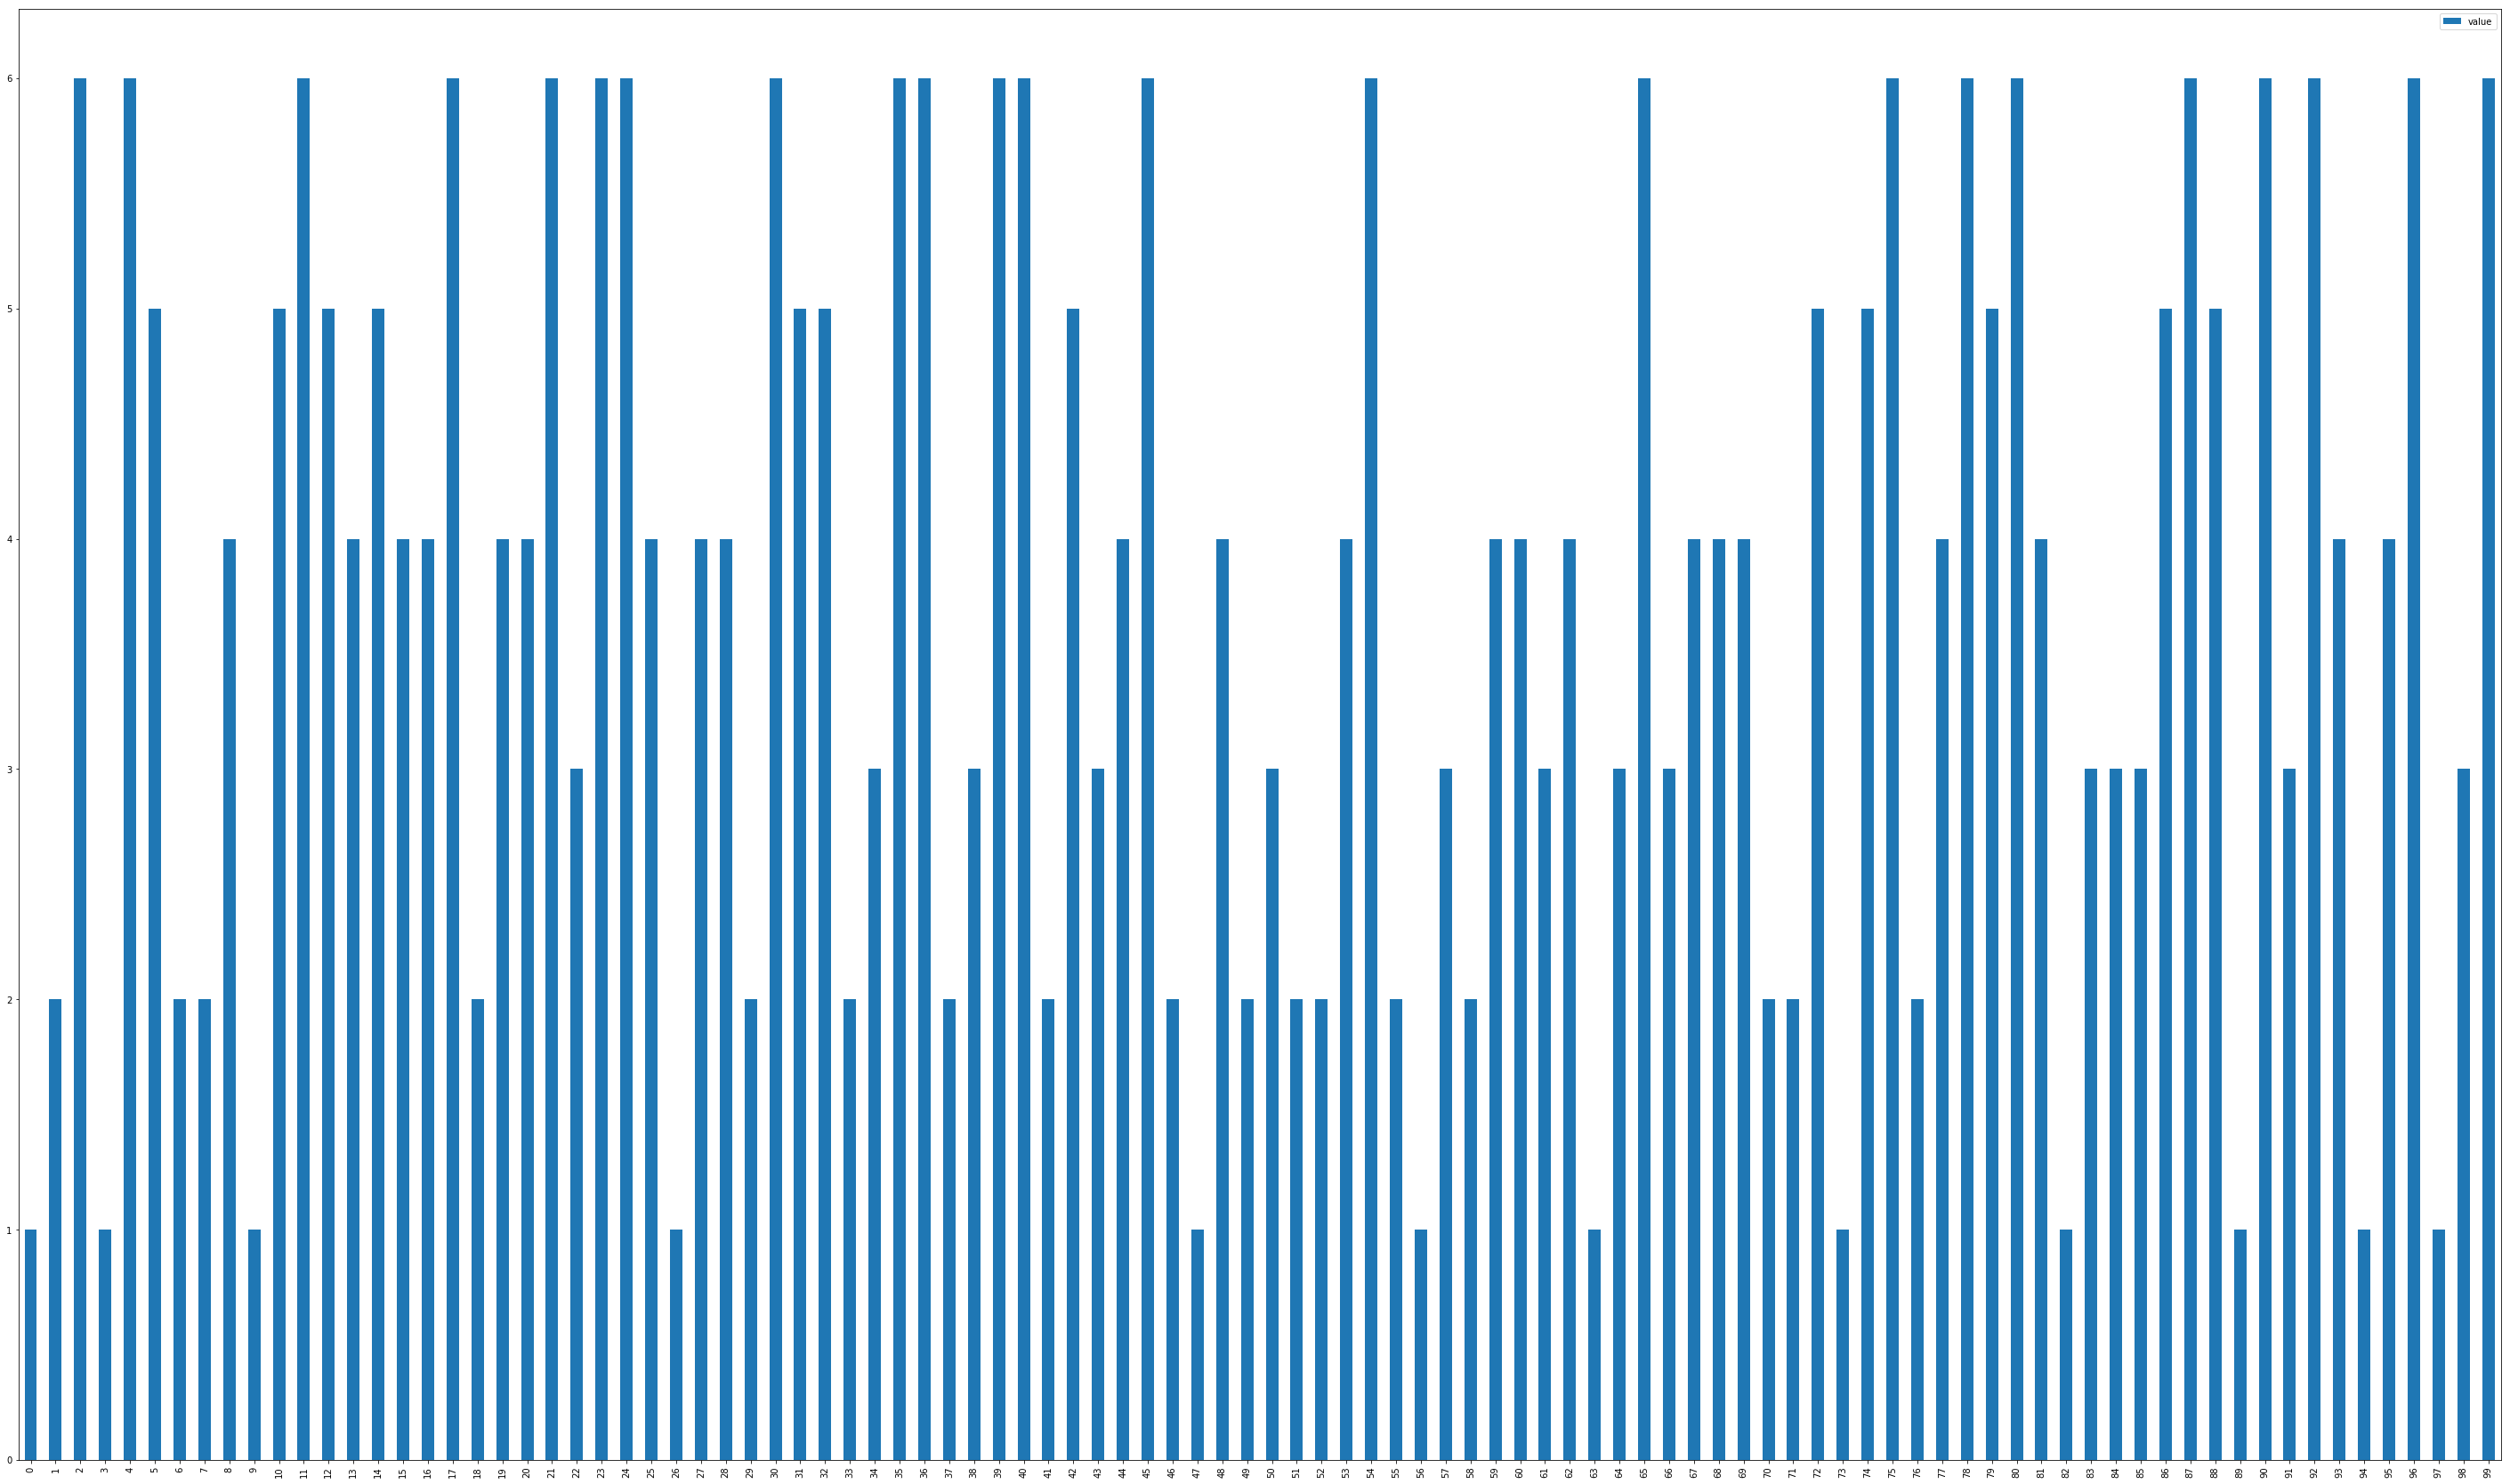

In [189]:
roll_hundred[['value']].plot(kind = 'bar', figsize=(50,30))

I see how the distribution of probability is constant along the dice number

In [191]:
roll_thousand = pd.read_csv('roll_the_dice_thousand.csv')

In [193]:
roll_thousand.tail()

,Unnamed: 0,roll,value
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3
999,999,999,6


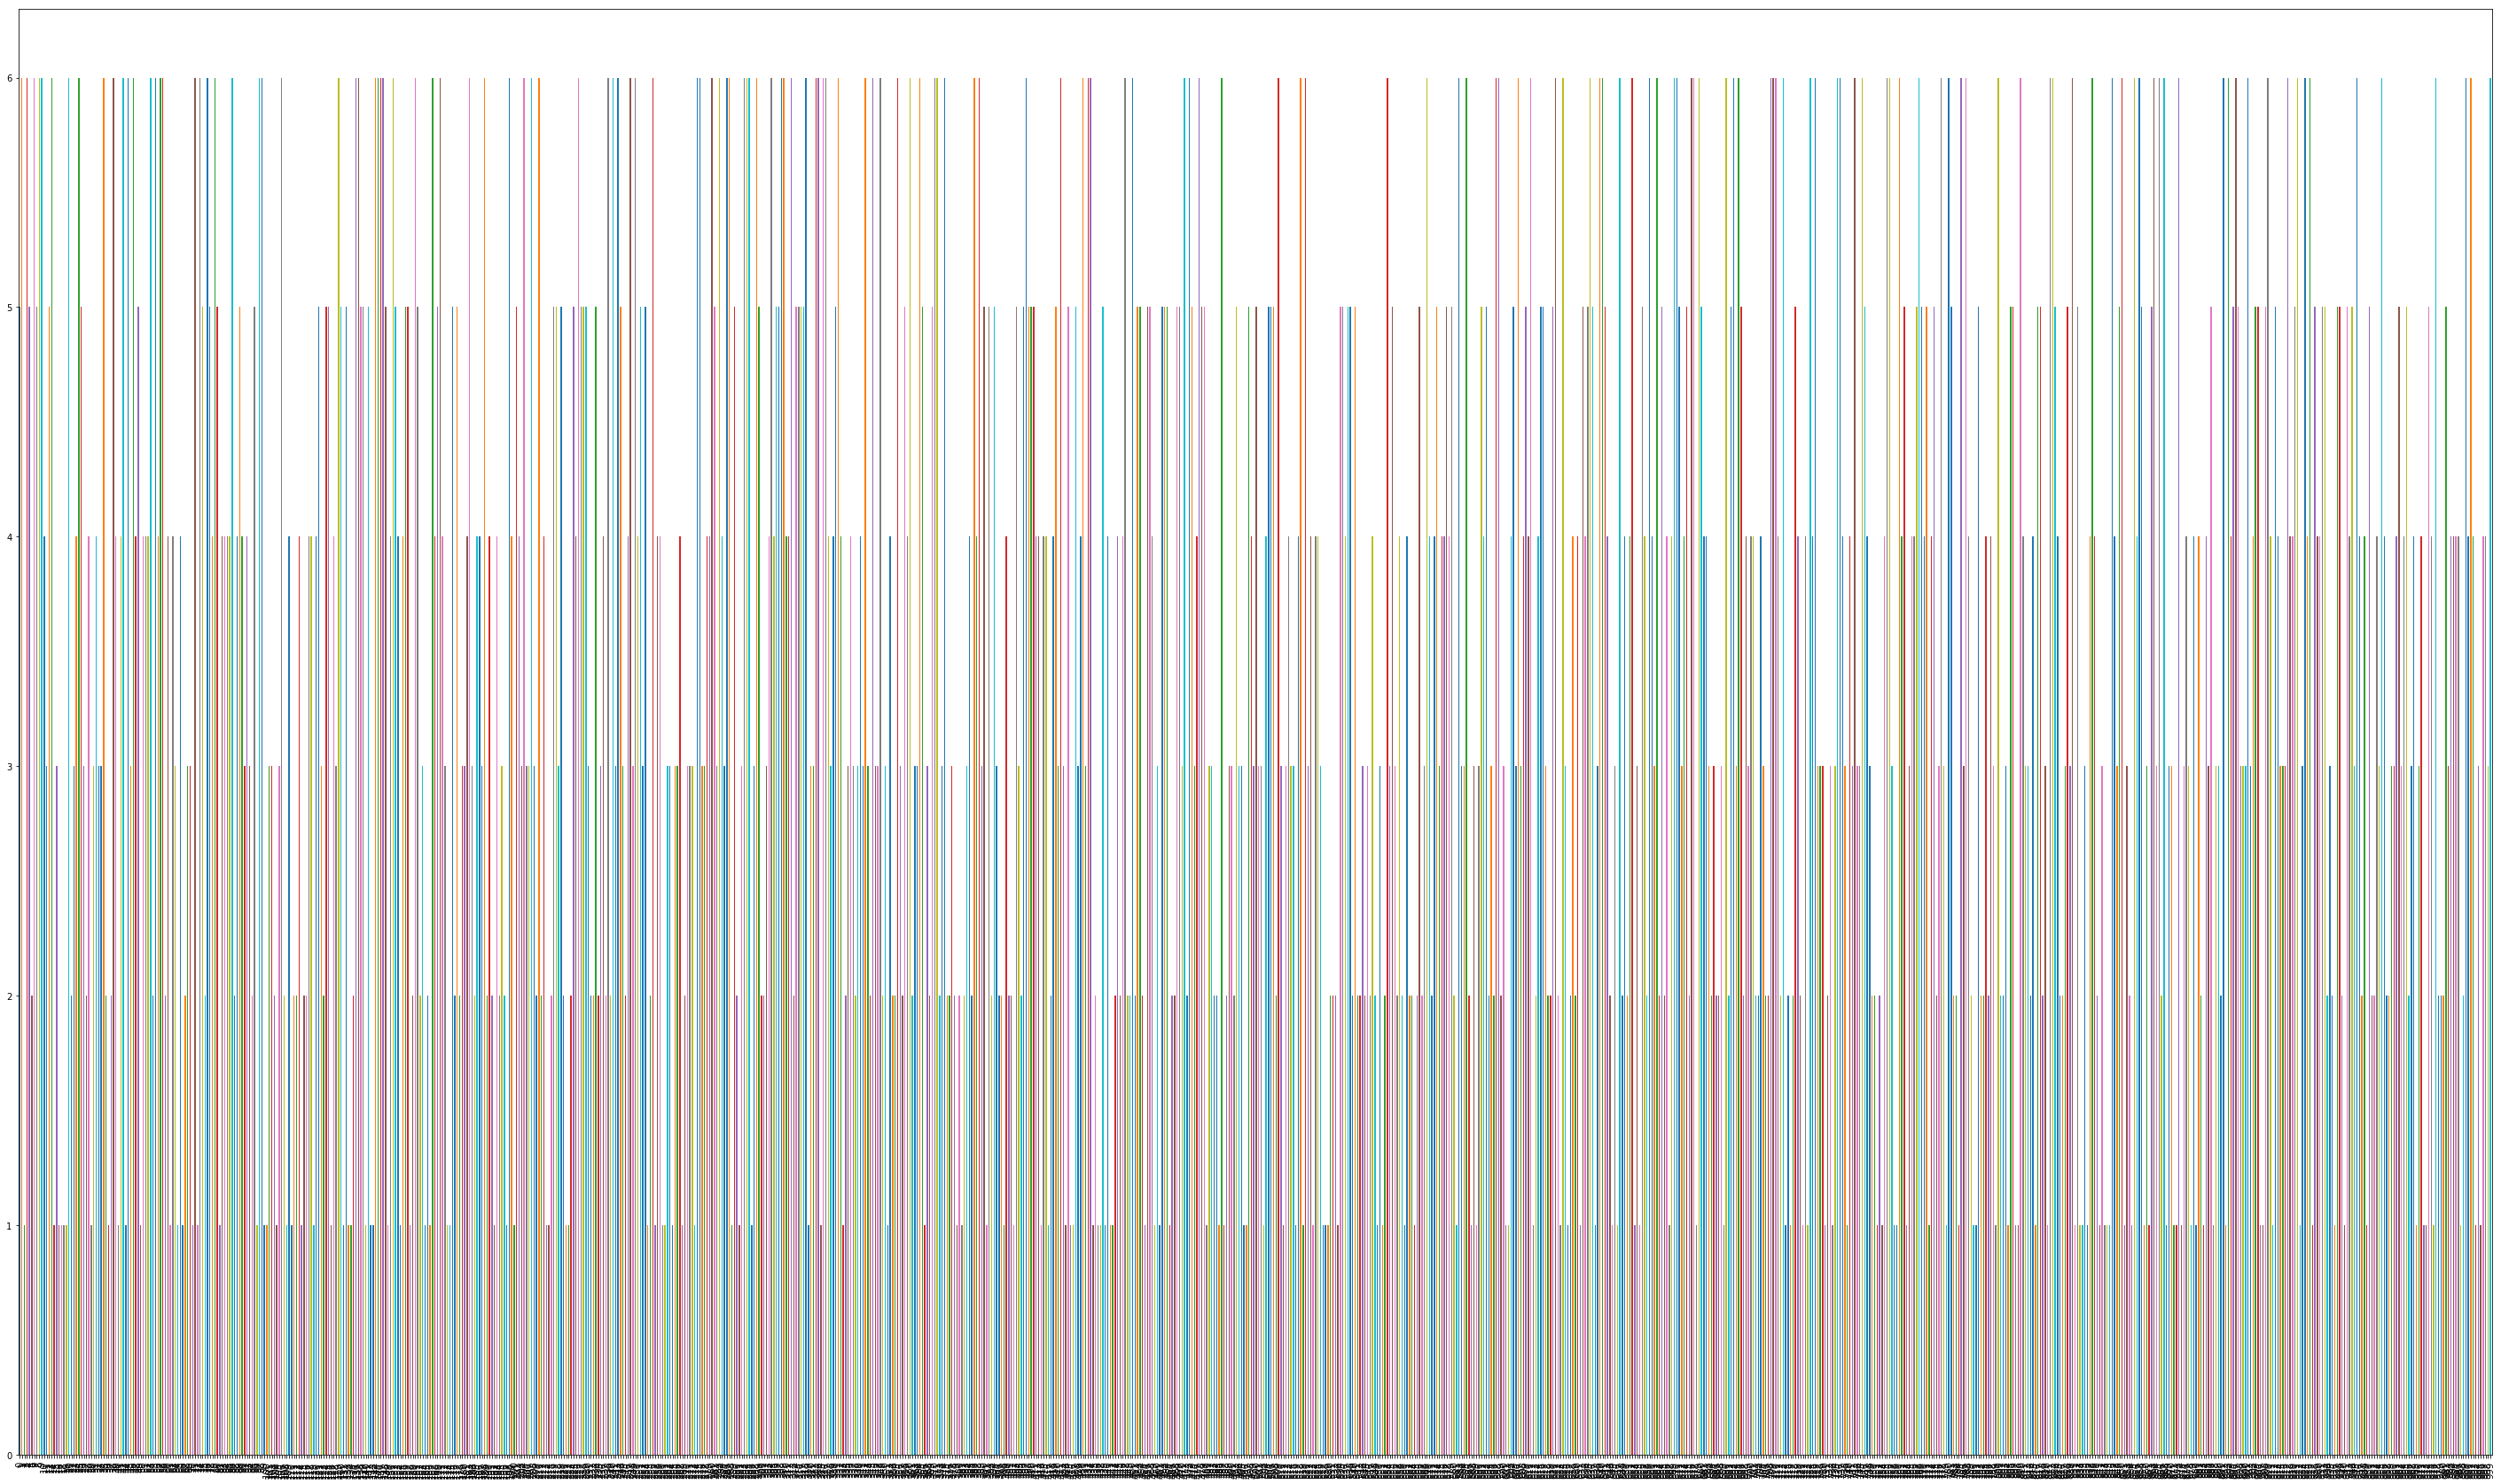

In [194]:
roll_thousand['value'].plot(kind = 'bar', figsize=(50,30))

Same, same

## Challenge 4
In the `ages_population` files, we will find some information about a poll we did to a thousand people. Each file corresponds to a different neighbourhood.
 
Read the csv `ages_population.csv`. Here you have a poll we did to people from here in Barcelona about their ages. You will find each observation in the csv.
* Calculate the frequency distribution and plot it as we did during the lesson. Define a range for the mean and std with the eye.
* Calculate the mean and the standard deviation and compare it with your range. Does it fit?
* Now read the csv `ages_population2.csv` and calculate the frequency distribution and plot it.
* What do you see? Is there any difference?
* Calculate the mean and std and compare with the last one. What do you think?

In [210]:
ages_popu = pd.read_csv('ages_population.csv')

In [211]:
ages_popu.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


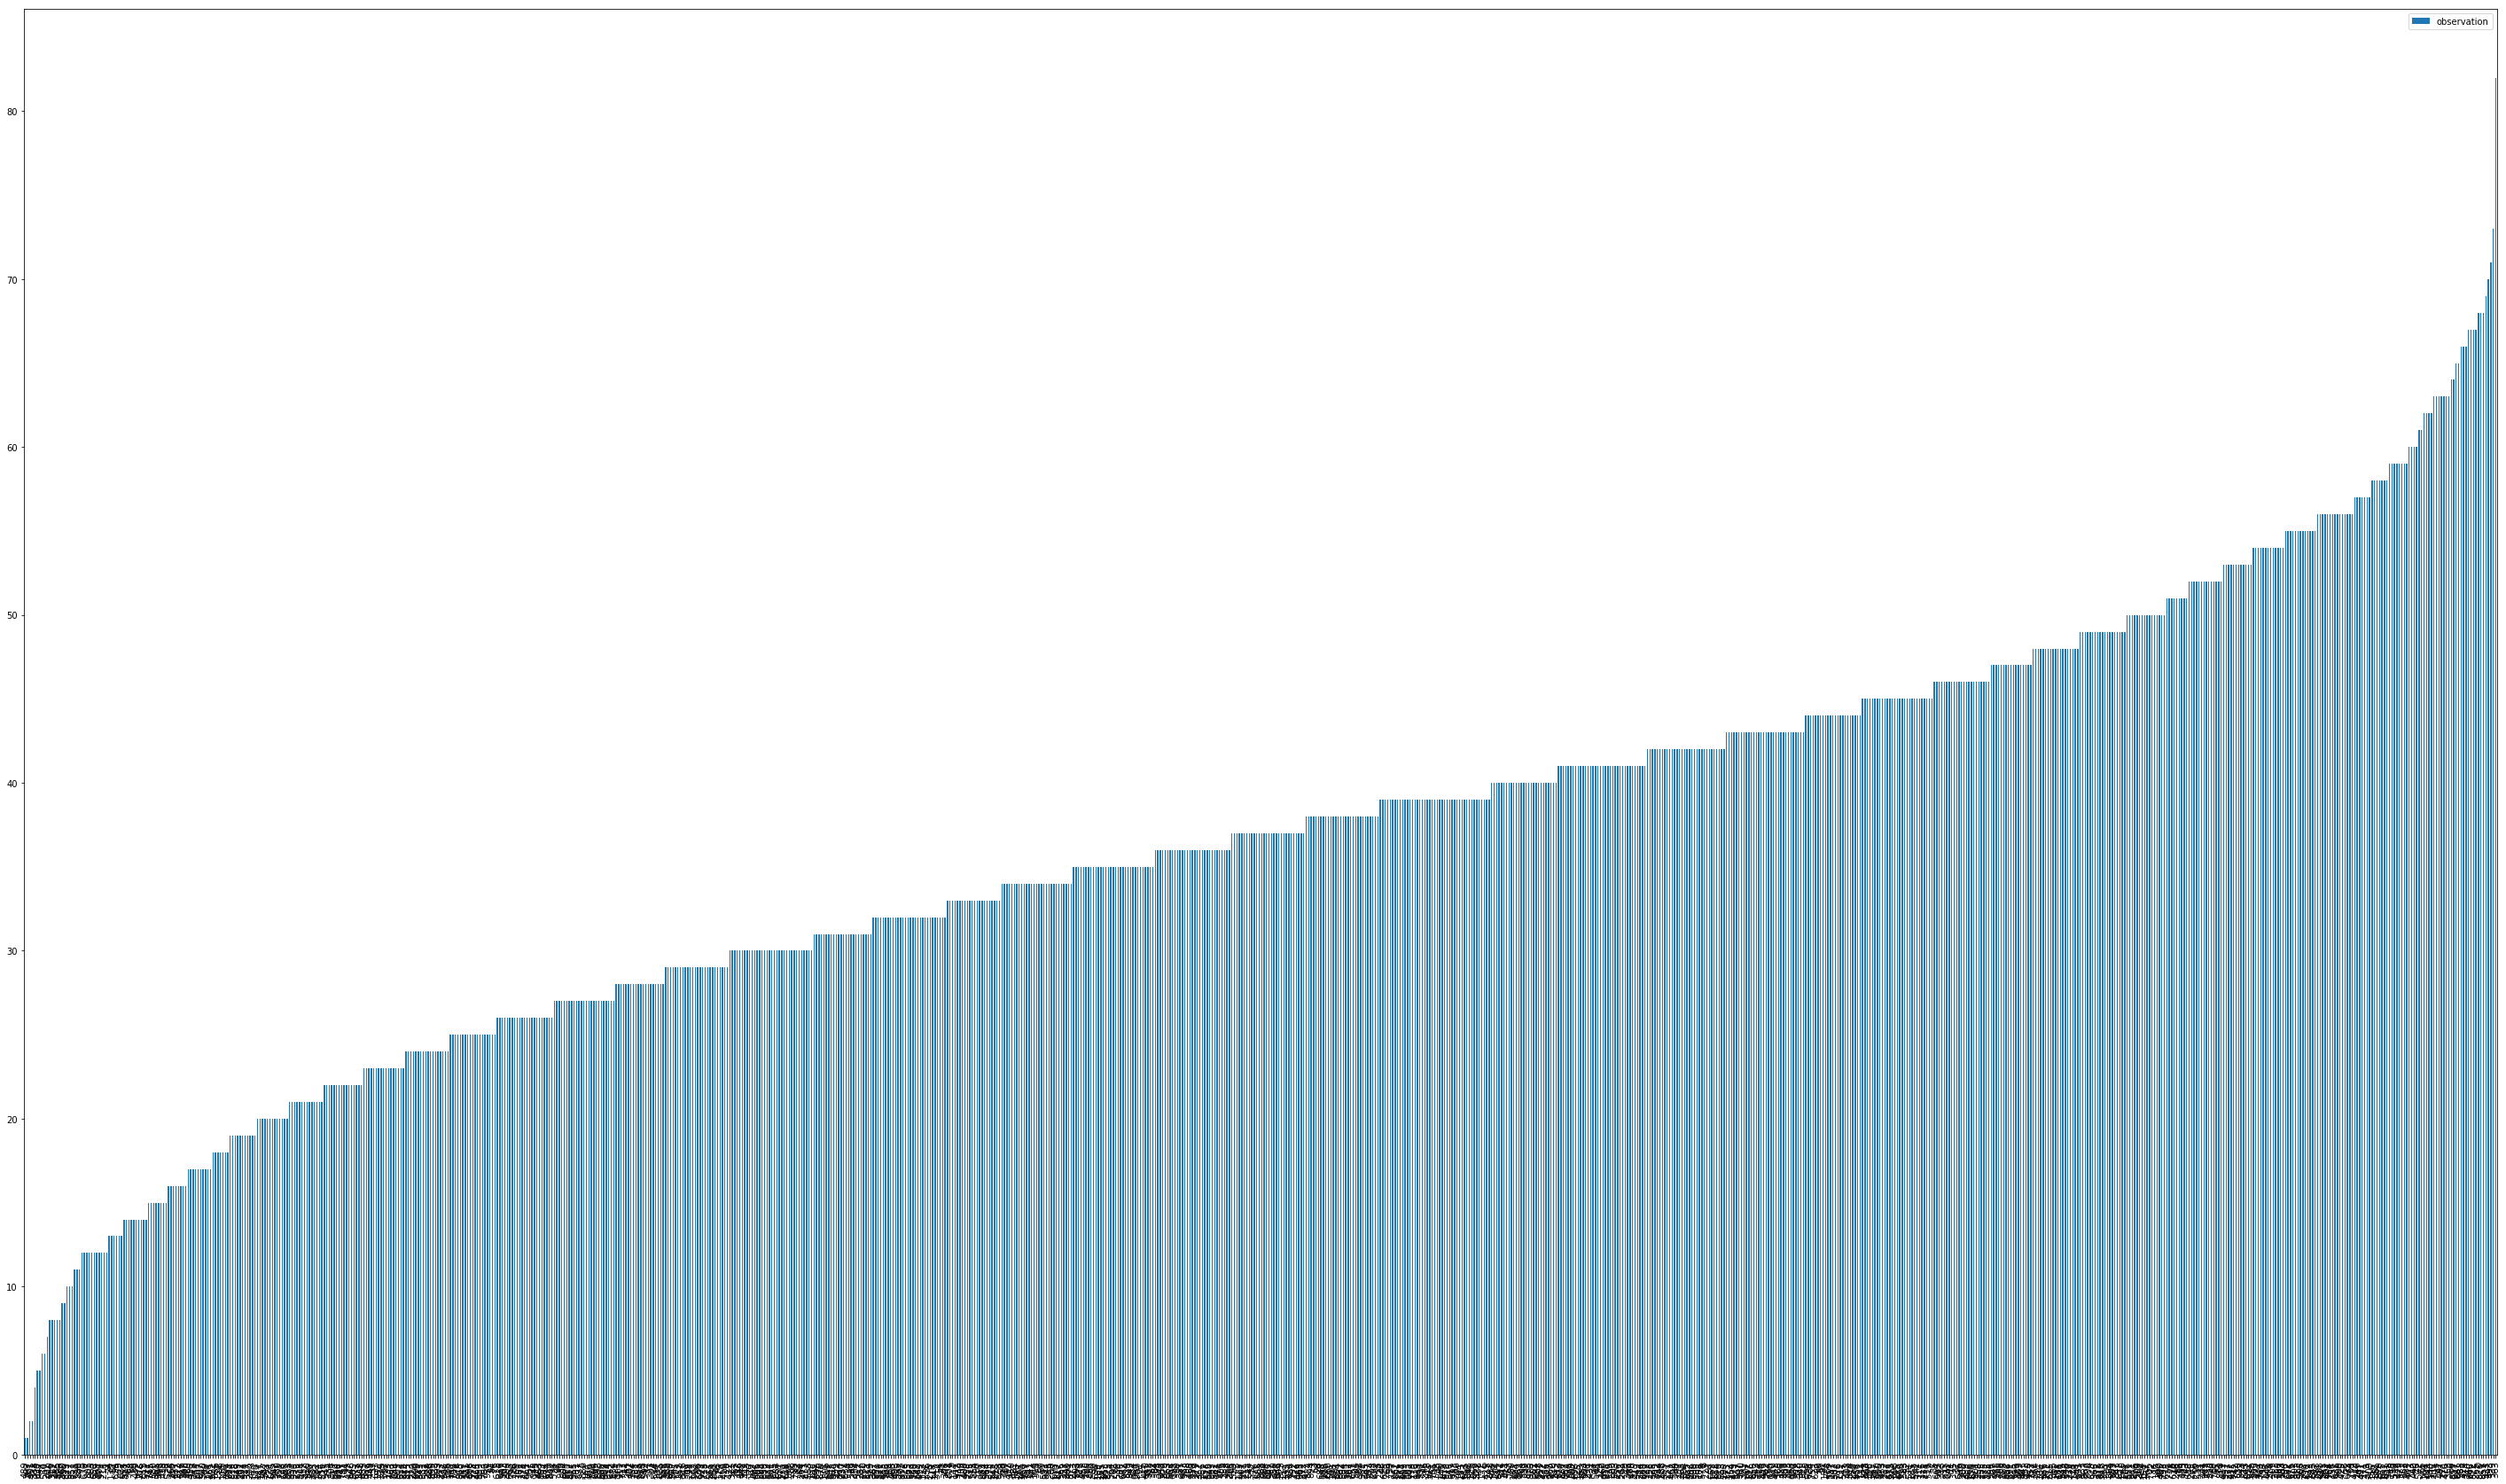

In [201]:
ages_popu.sort_values(by = 'observation').plot(kind='bar', figsize=(50,30))

In [203]:
ages_popu['observation'].max()

82.0

In [216]:
freq_ages = ages_popu['observation'].value_counts()

In [225]:
freq_ages = freq_ages.sort_index().reset_index().rename(columns = {'index' : 'age'})

In [235]:
freq_ages.tail(10)

,age,observation
62,64.0,2
63,65.0,2
64,66.0,3
65,67.0,4
66,68.0,3
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1
71,82.0,1


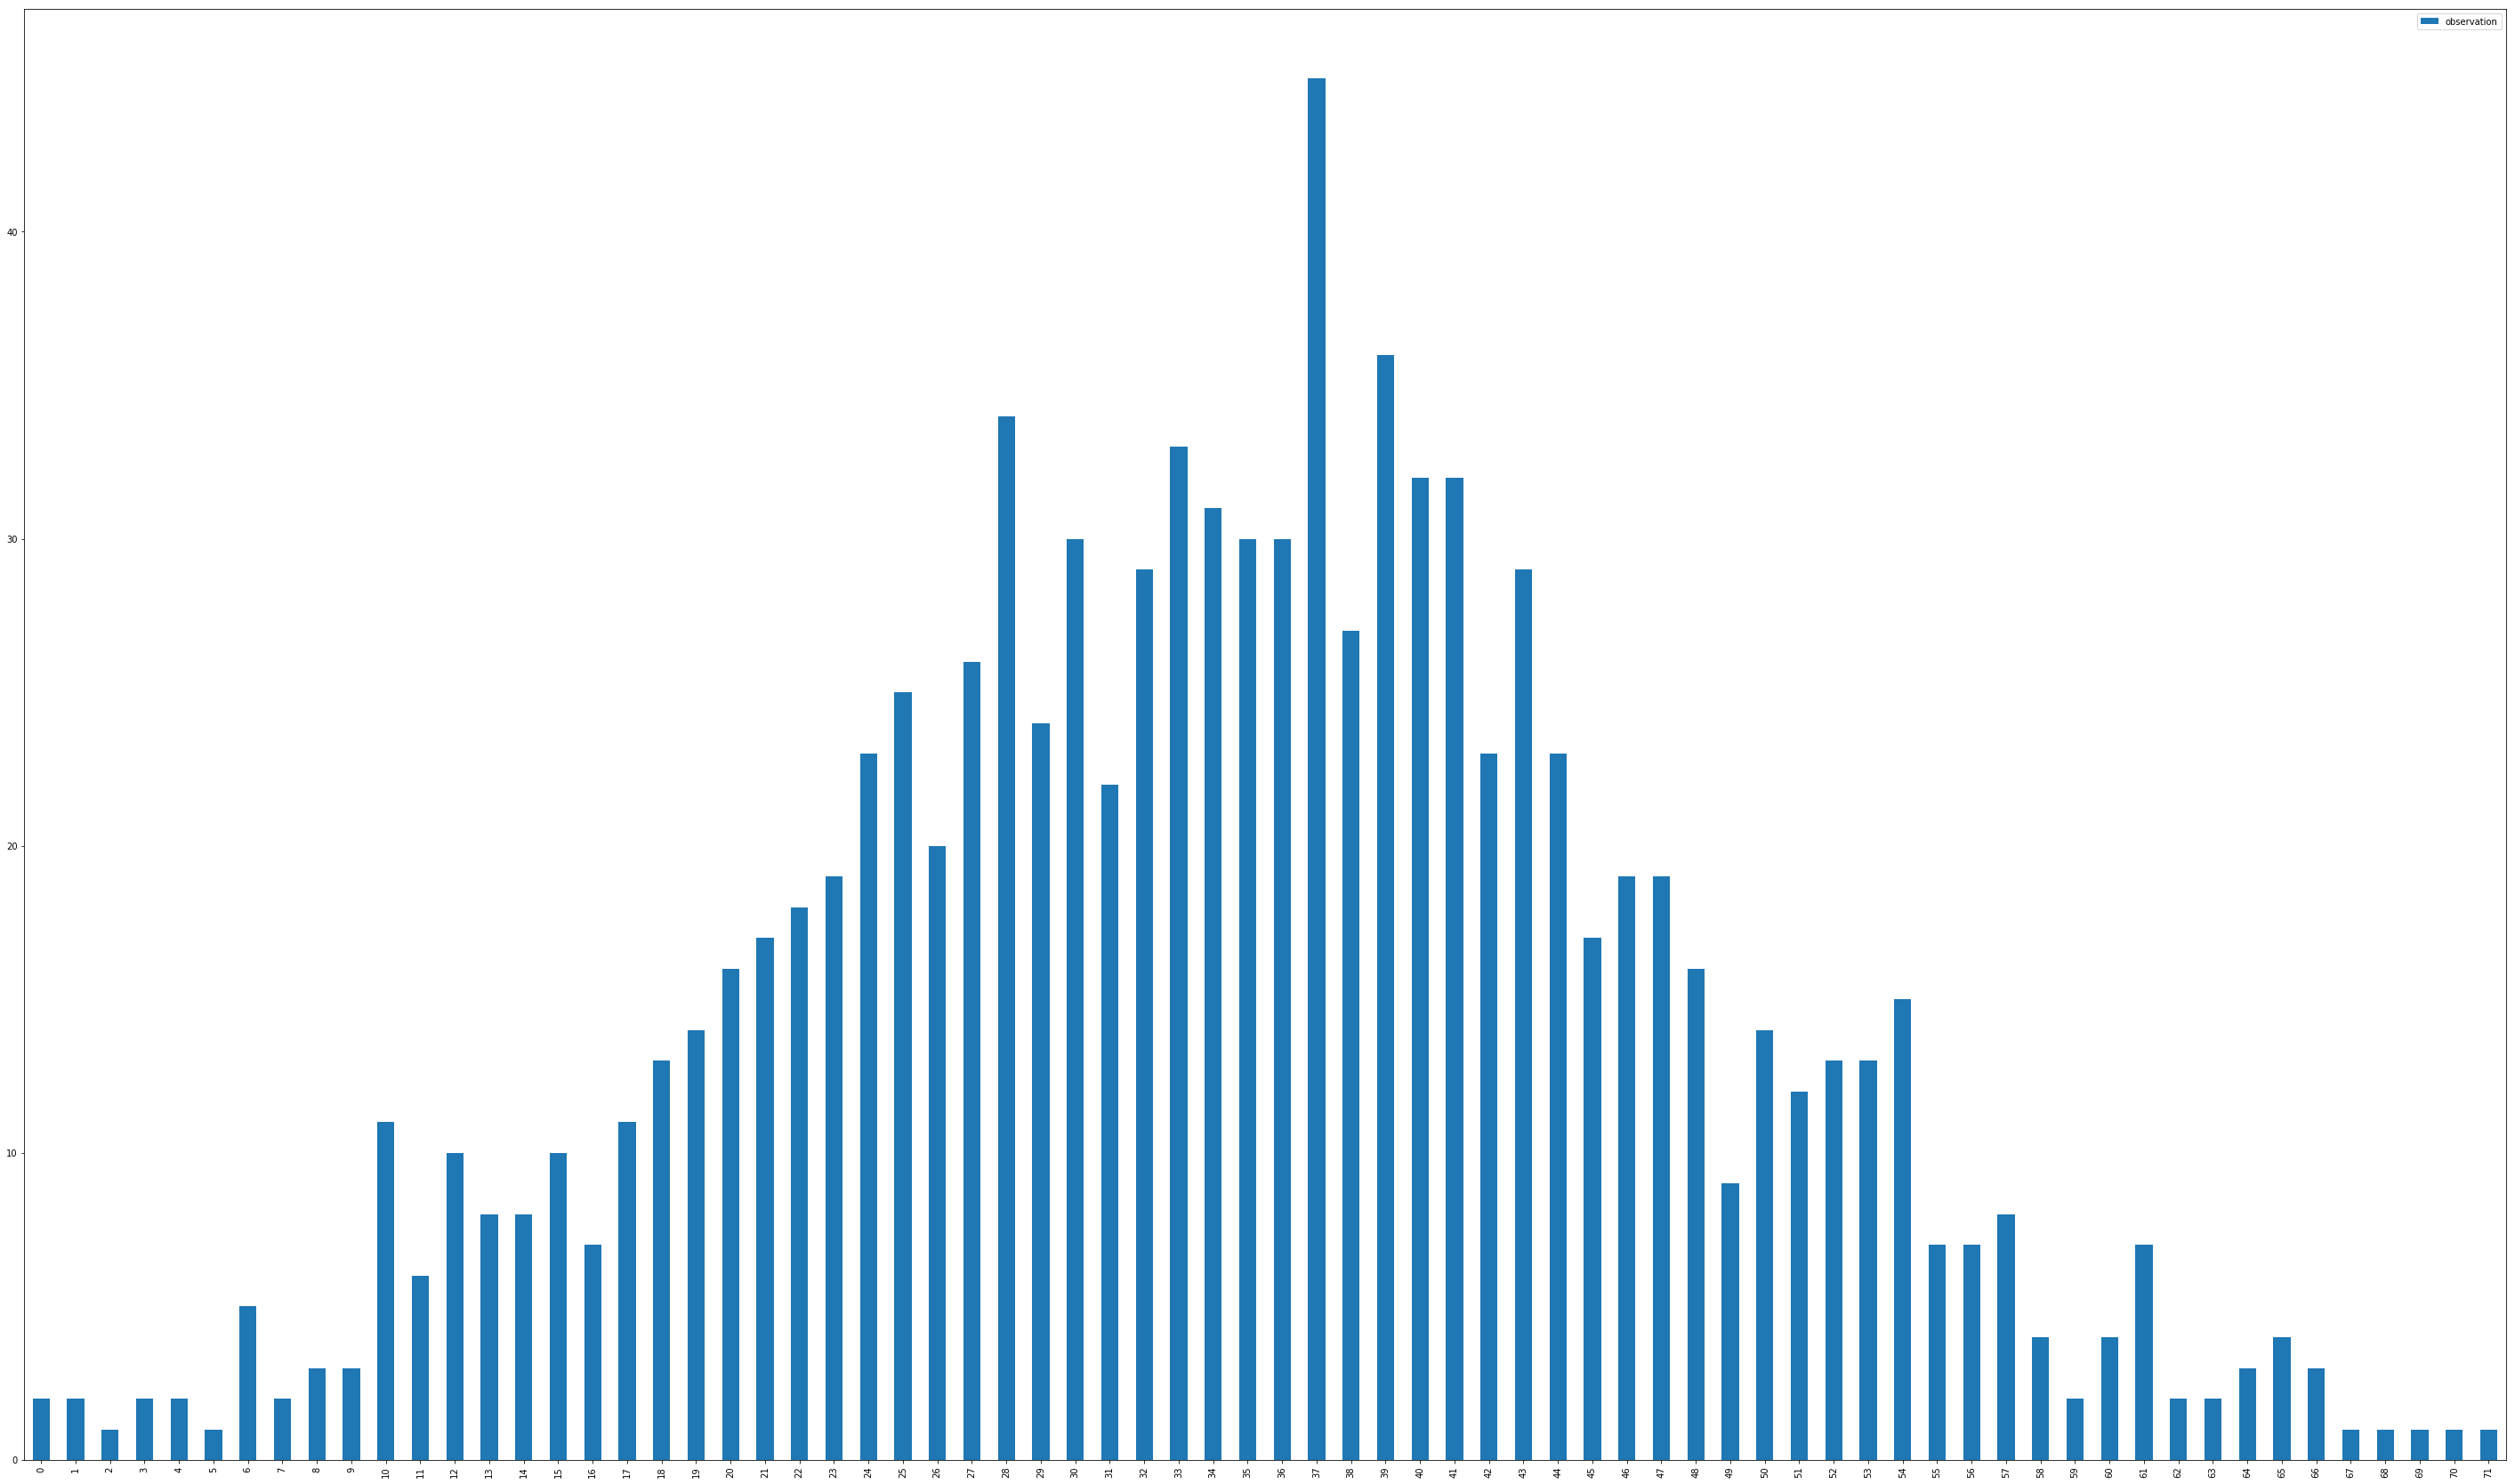

In [232]:
freq_ages[['observation']].plot(kind = 'bar', figsize= (50, 30))

In [240]:
list_to_100 = pd.DataFrame(data = {'age' :[i for i in range(100)]})

In [241]:
list_to_100

,age
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


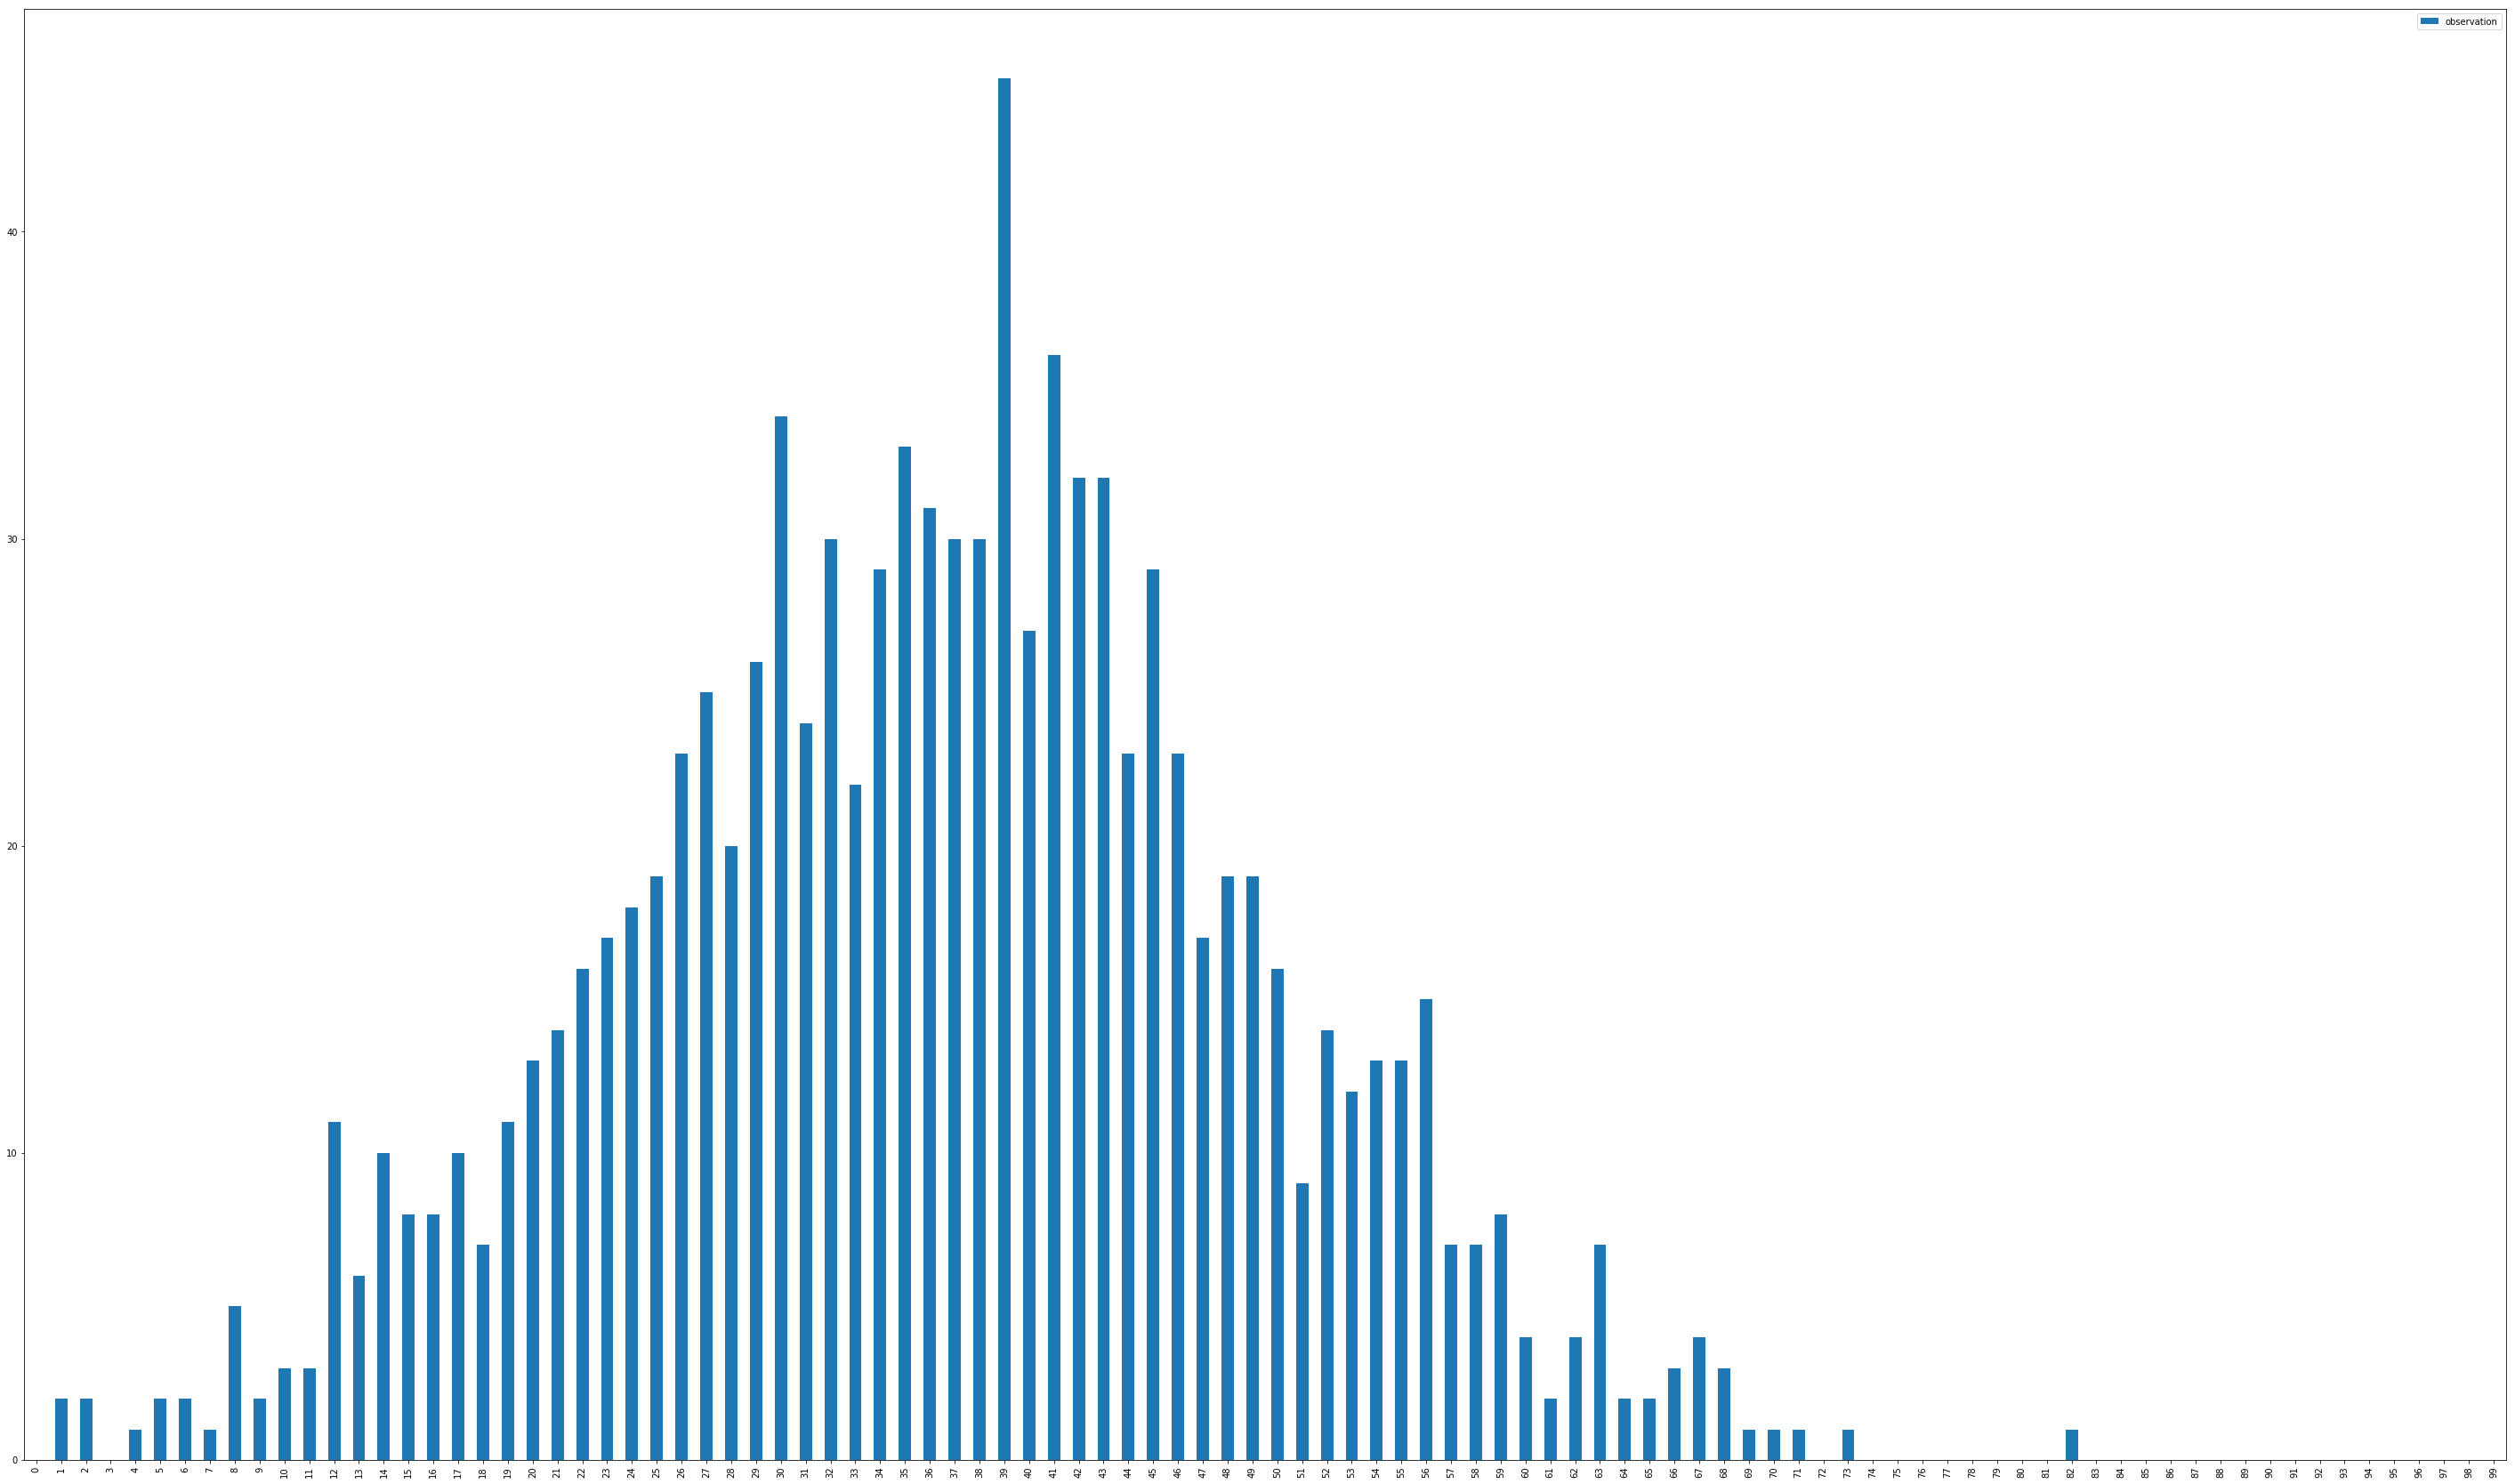

In [247]:
list_to_100.merge(freq_ages, how='left').fillna(0)[['observation']].plot(kind= 'bar', figsize = (50, 30))

Define a range for the mean and std with the eye. 35 mean, 10 SD

In [234]:
ages_popu.mean()

observation    36.56
dtype: float64

In [248]:
ages_popu.std()

observation    12.8165
dtype: float64

In [249]:
ages_popu2 = pd.read_csv('ages_population2.csv')

In [254]:
freq_ages2 = ages_popu2['observation'].value_counts()

In [257]:
freq_ages2 = freq_ages2.sort_index().reset_index().rename(columns = {'index' : 'age'})

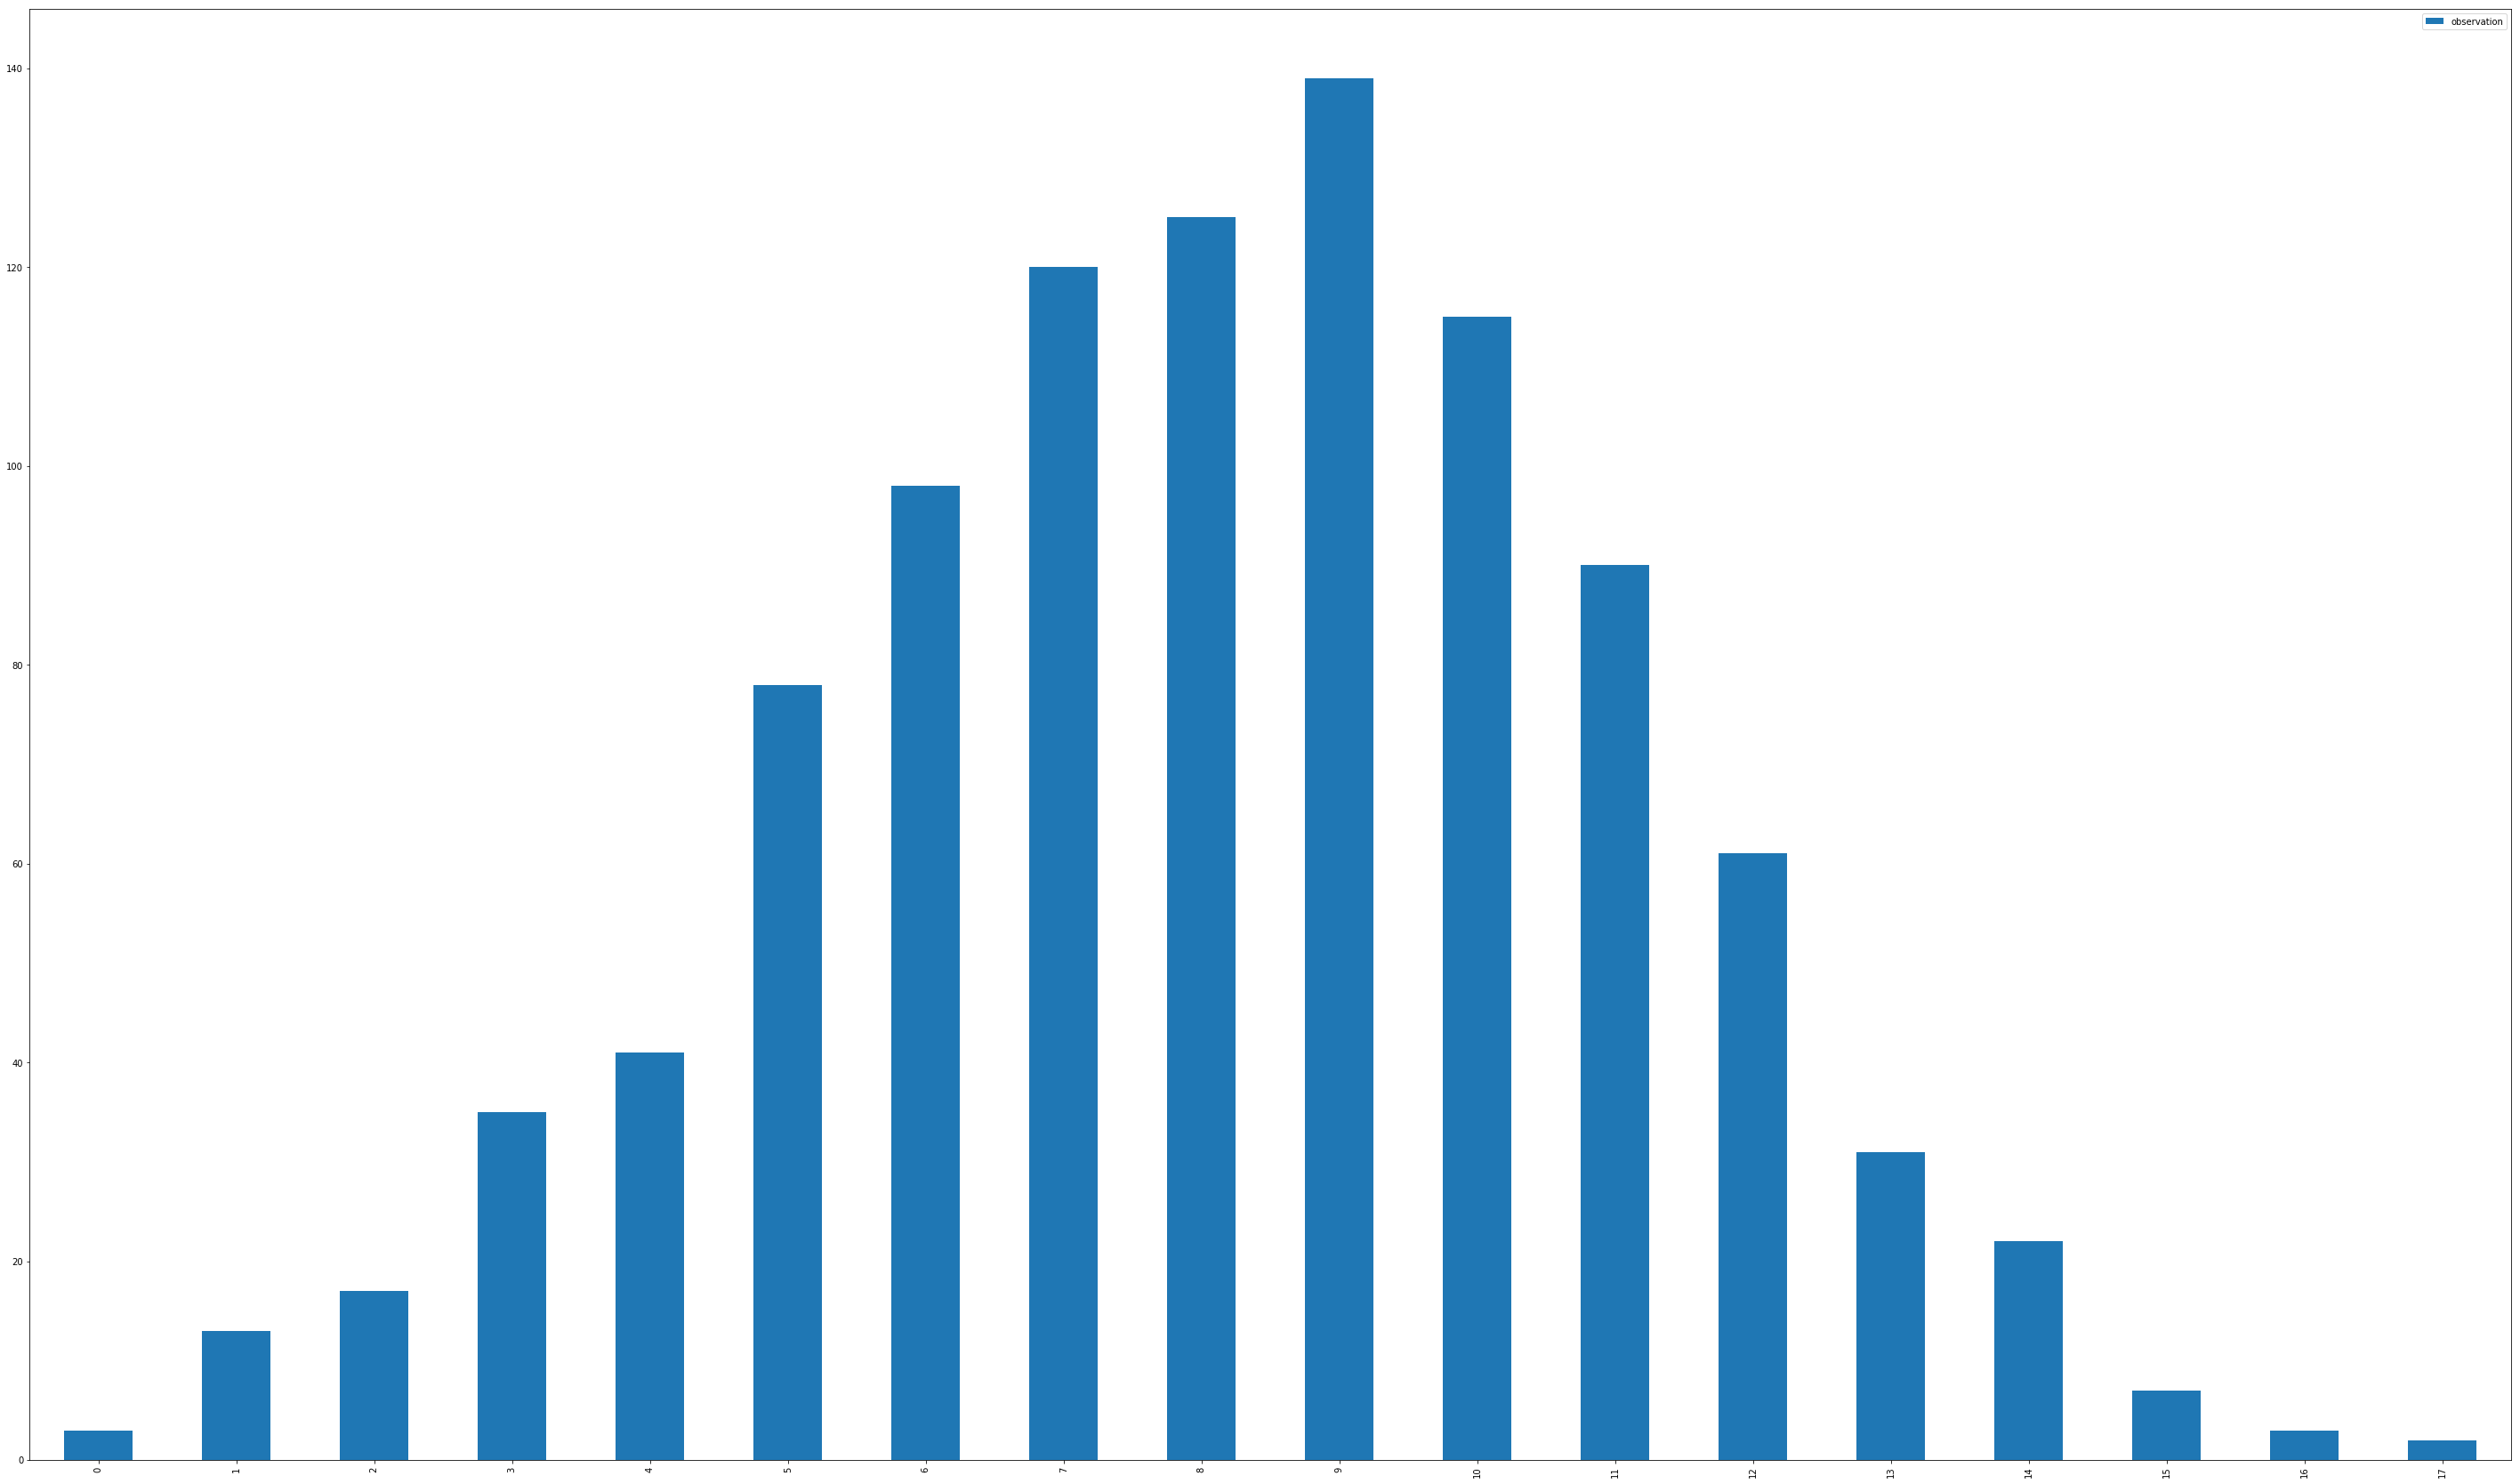

In [259]:

freq_ages2[['observation']].plot(kind = 'bar', figsize = (50, 30))

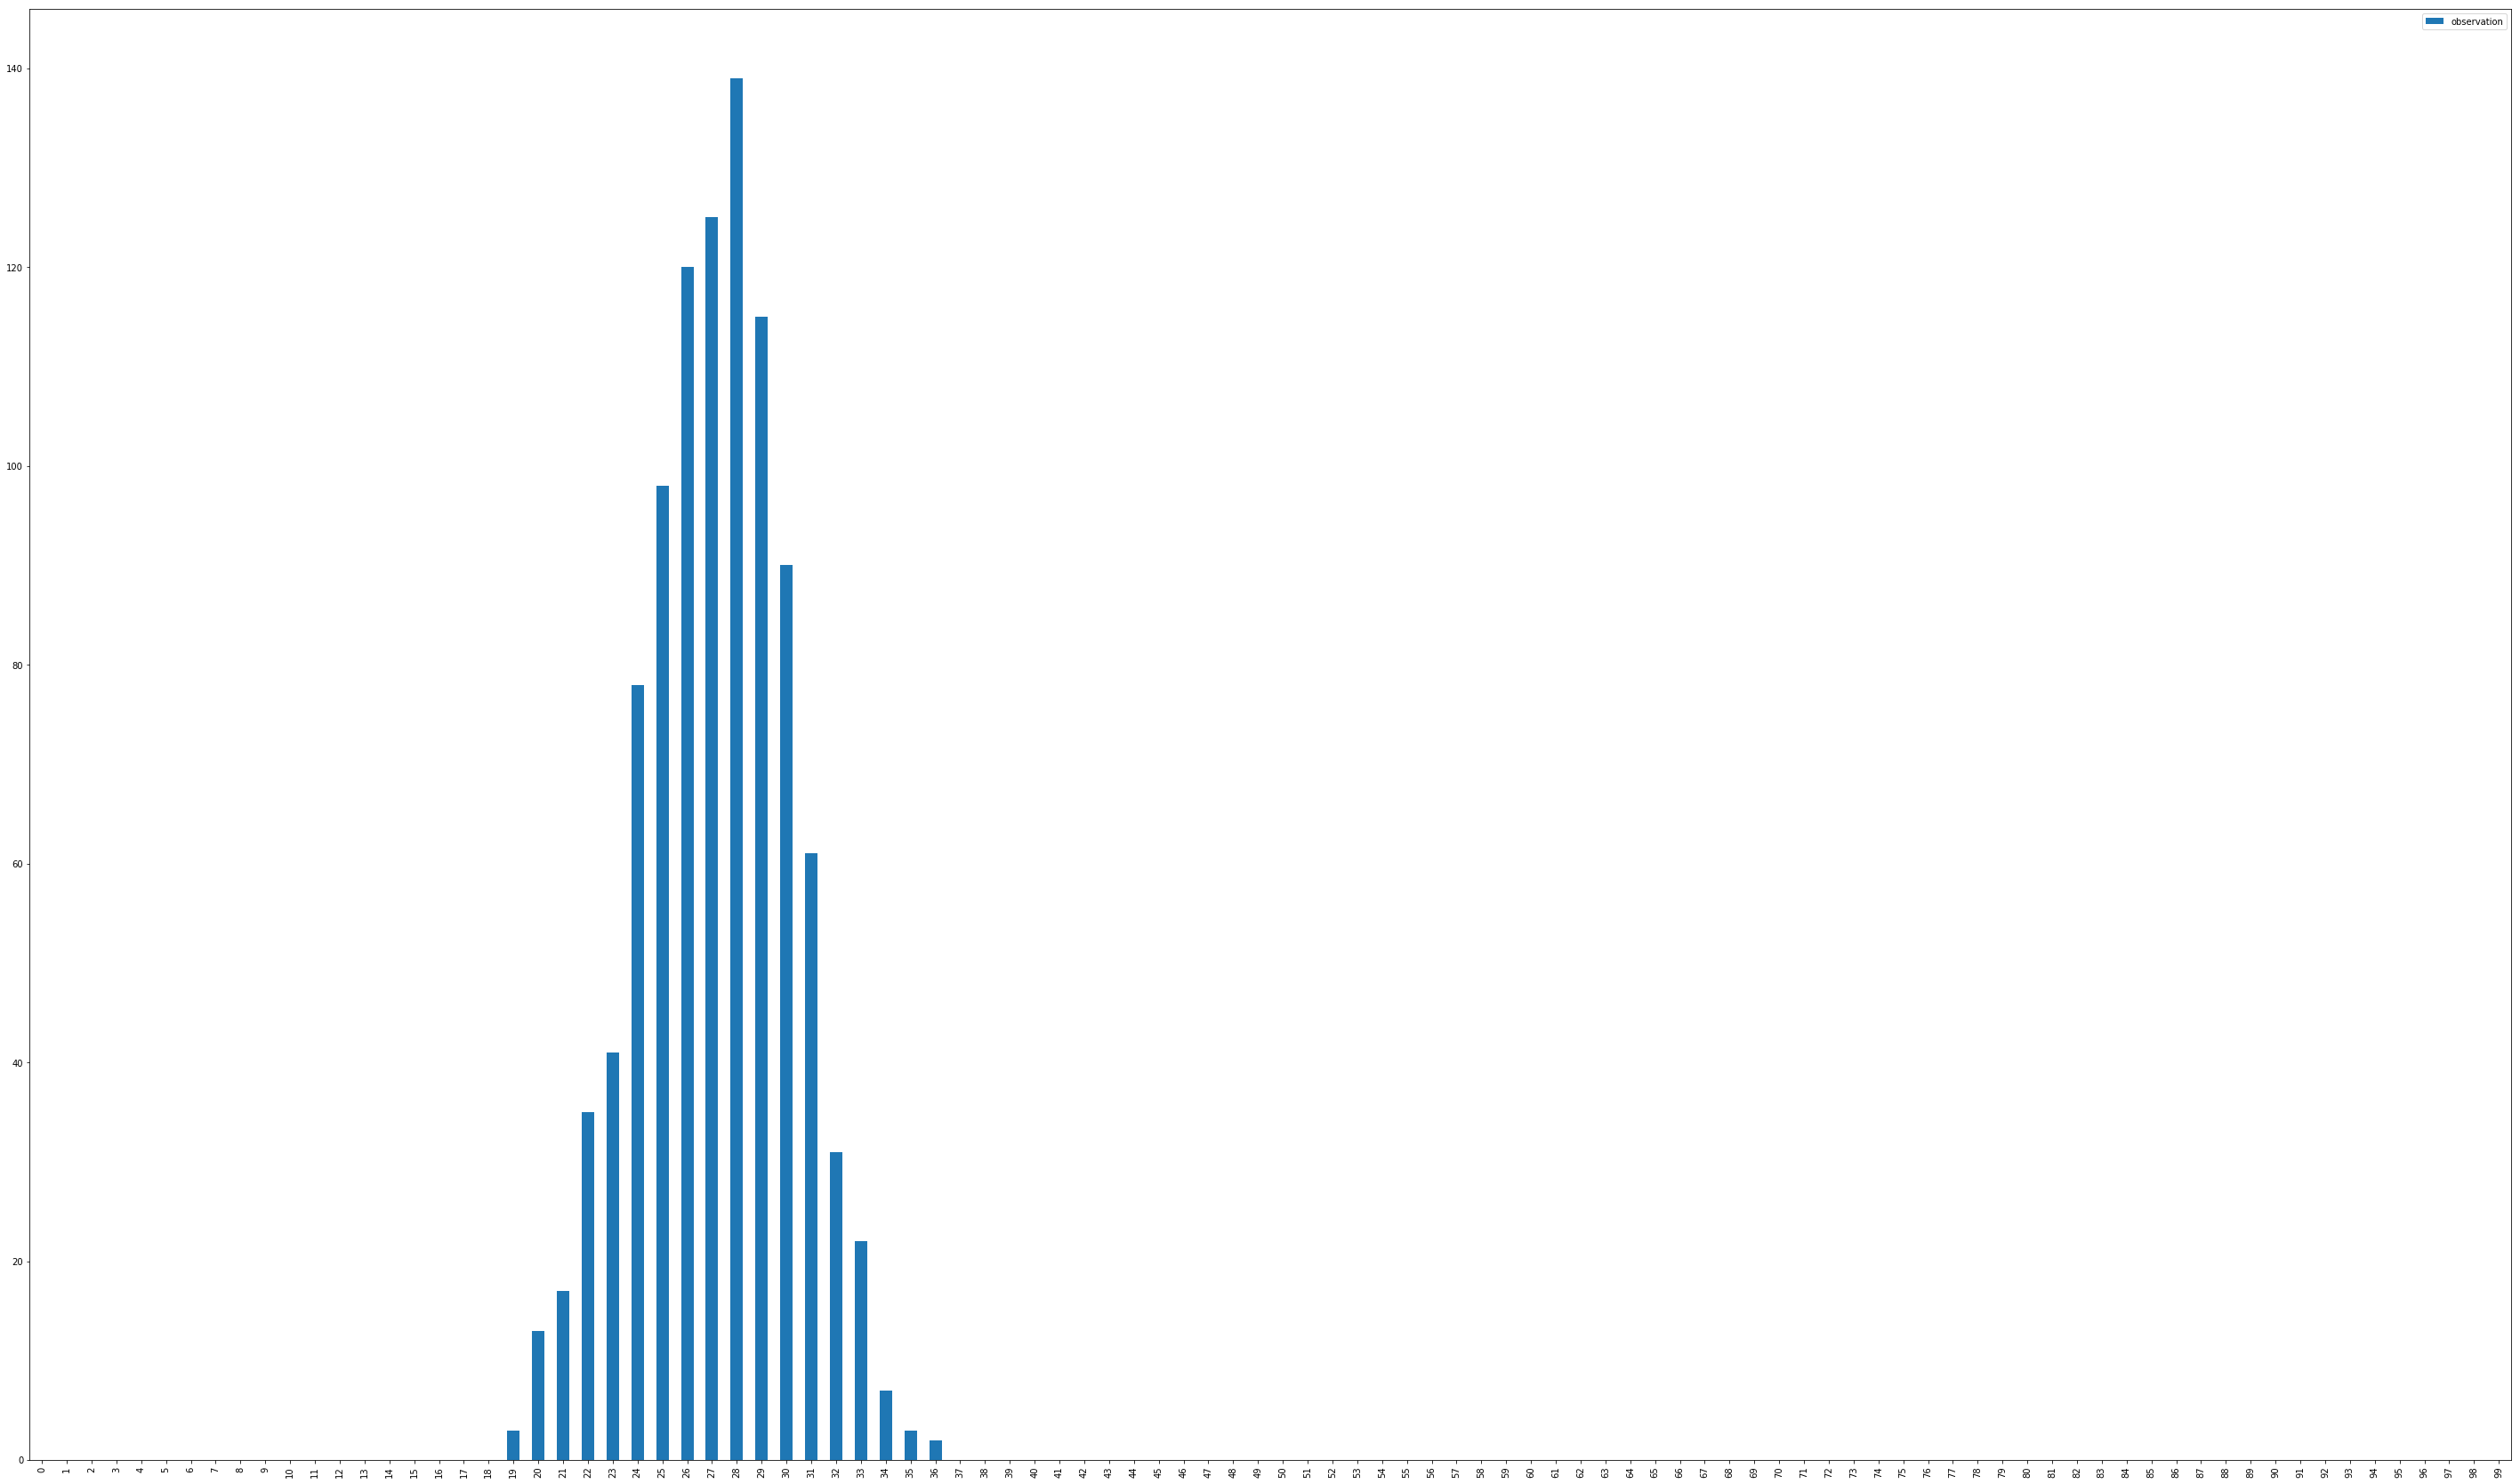

In [264]:
list_to_100.merge(freq_ages2, how ='left').fillna(0)[['observation']].plot(kind = 'bar', figsize = (50, 30))

Very sharp age distribution. Short mean and std (3)

In [265]:
ages_popu2.mean()

observation    27.155
dtype: float64

In [267]:
ages_popu2.std()

observation    2.969814
dtype: float64

## Challenge 5
Now is the turn of `ages_population3.csv`.
* Calculate the frequency distribution and plot it as we did during the lesson. 
* Calculate the mean and std and compare with the plot. What is happening?
* Calculate the four quartiles and give some arguments for the last question using them. How much difference there is between median and mean?
* Calculate some other percentiles that can be useful to give more arguments. 

In [276]:
age_popu3 = pd.read_csv('ages_population3.csv')

In [277]:
age_popu3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [279]:
freq_ages3 = age_popu3['observation'].value_counts()

In [280]:
freq_ages3 

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
41.0    25
38.0    25
48.0    25
29.0    25
30.0    24
45.0    24
46.0    22
43.0    22
67.0    22
50.0    21
40.0    21
31.0    21
34.0    20
70.0    19
27.0    19
66.0    19
24.0    19
49.0    18
28.0    18
25.0    17
33.0    17
68.0    17
44.0    17
69.0    17
52.0    17
        ..
56.0    10
17.0    10
54.0     9
16.0     9
18.0     9
57.0     8
59.0     8
15.0     8
72.0     8
58.0     6
73.0     6
61.0     6
74.0     6
60.0     6
14.0     5
12.0     4
62.0     3
11.0     2
77.0     2
4.0      2
13.0     2
75.0     2
10.0     2
2.0      2
8.0      1
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

In [281]:
freq_ages3 = freq_ages3.sort_index().reset_index().rename(columns = {'index' : 'age'})

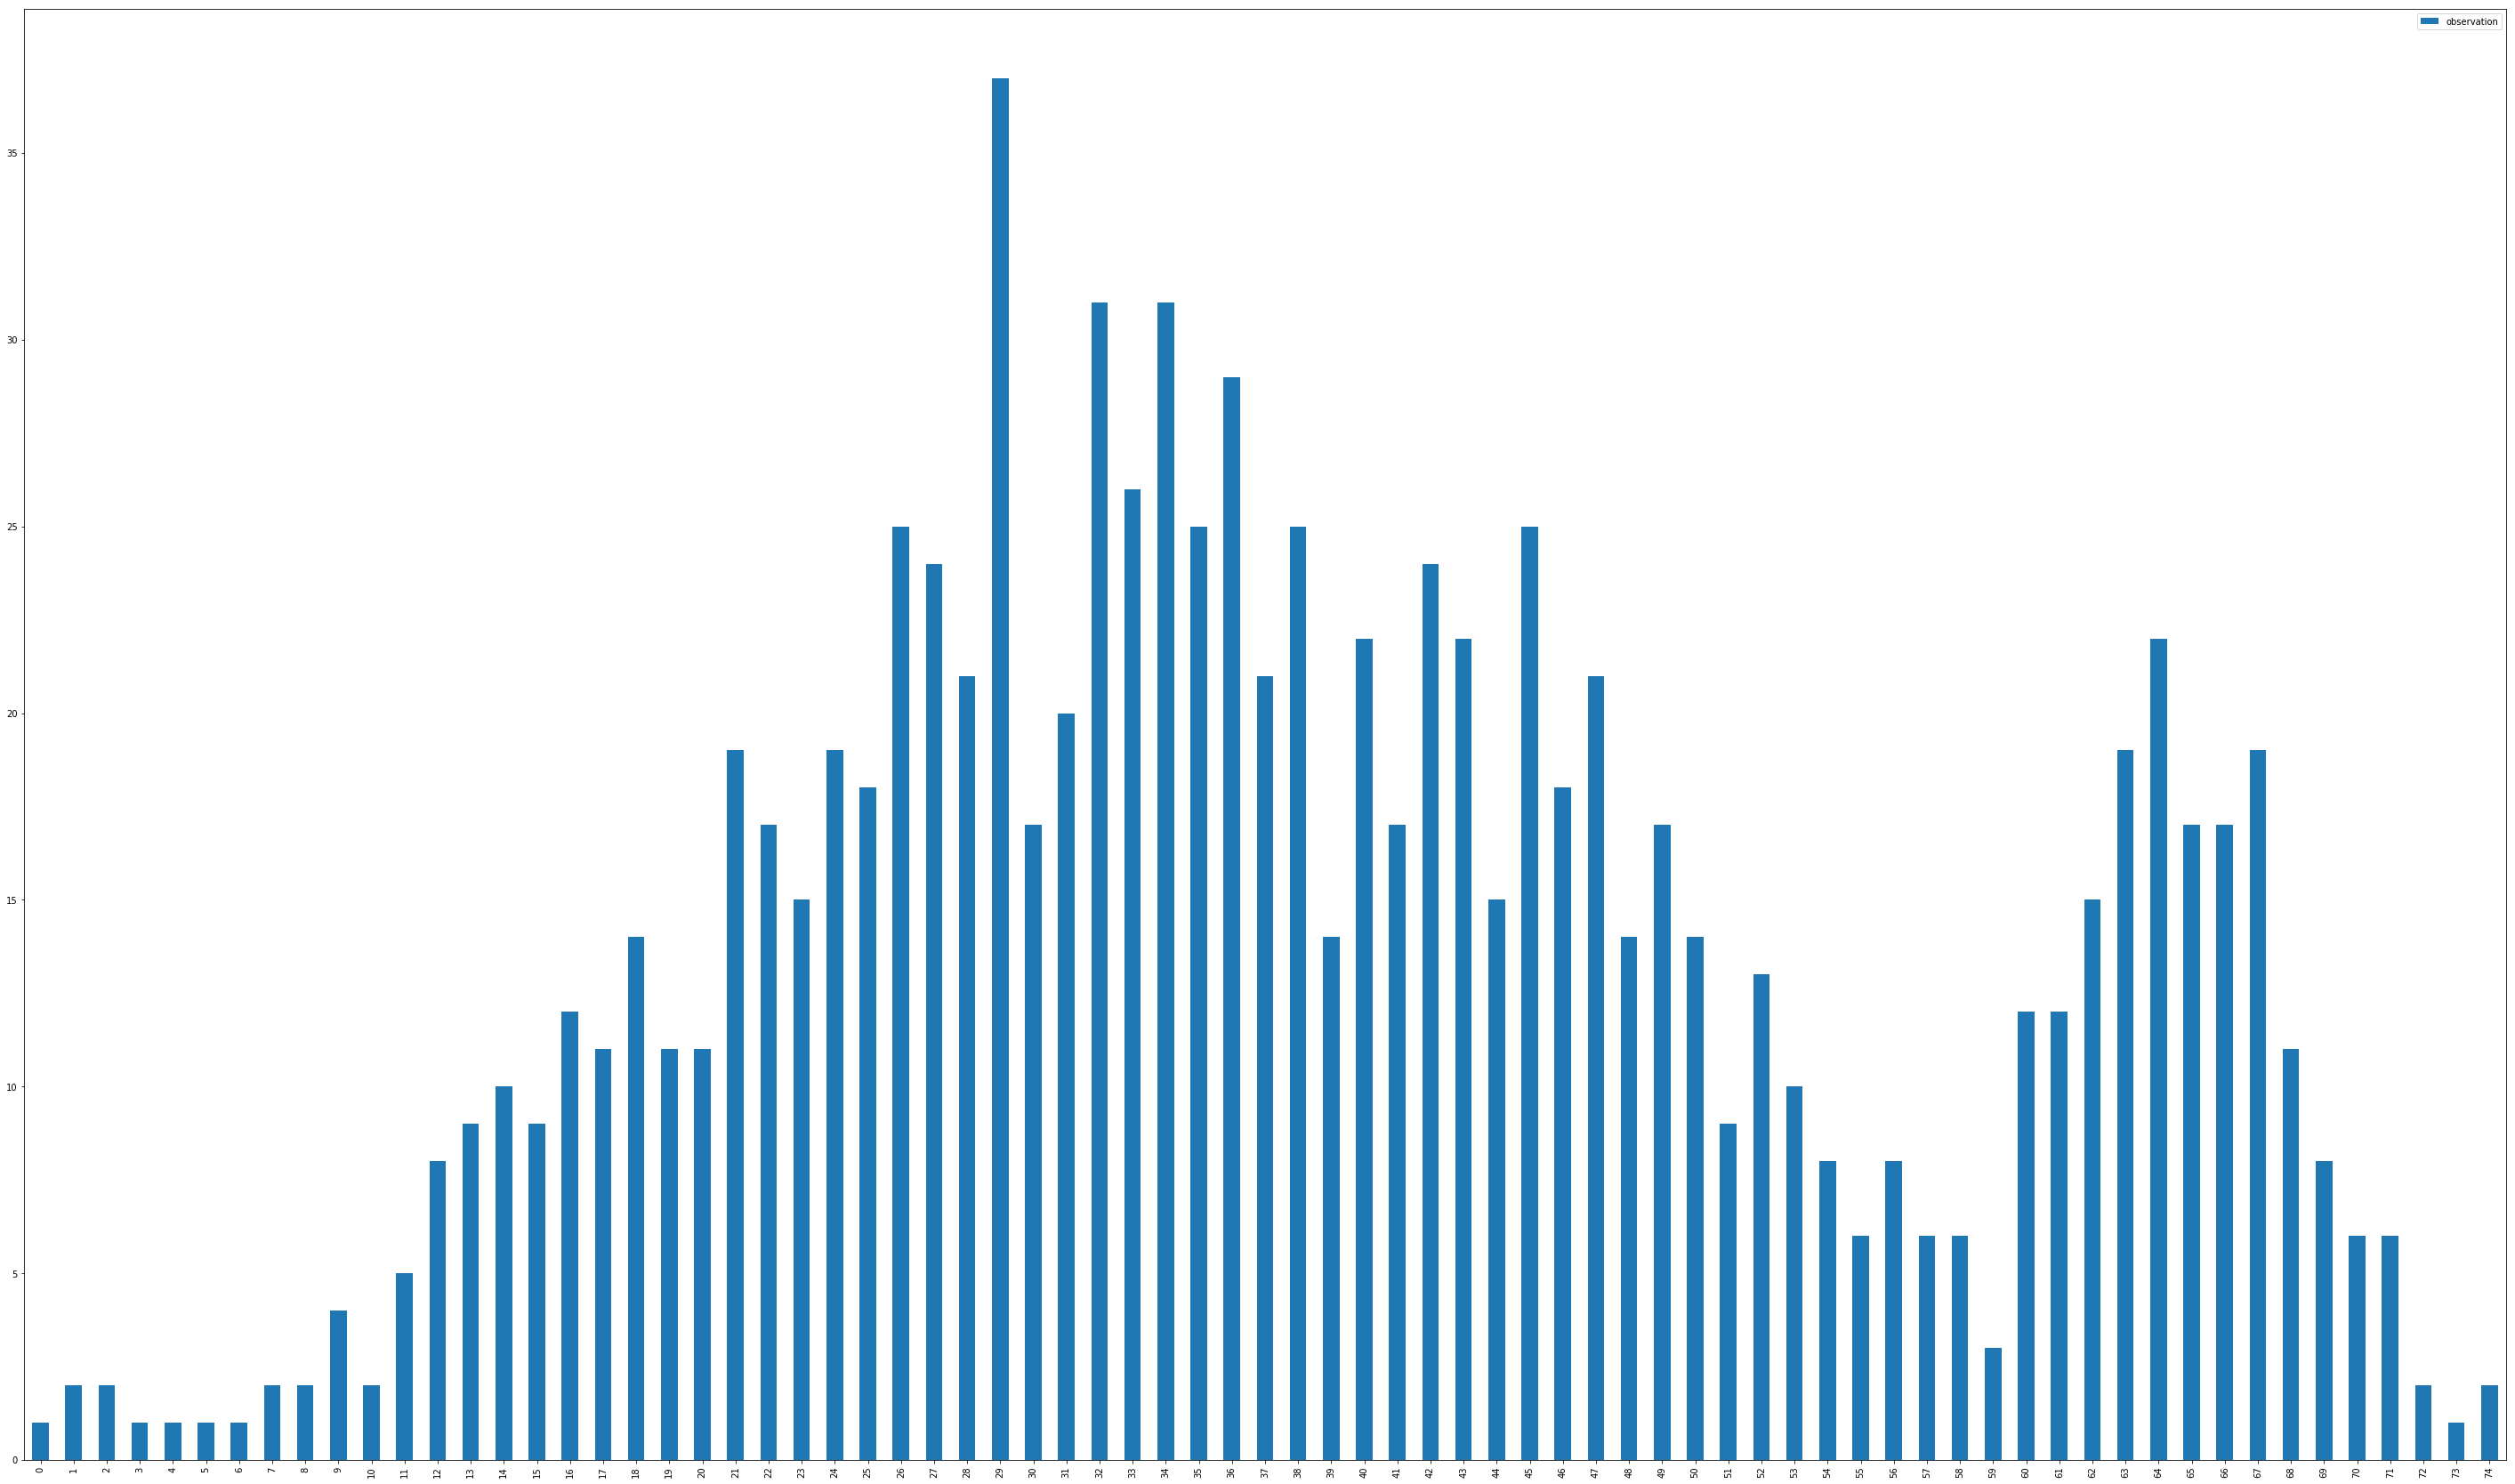

In [282]:
freq_ages3[['observation']].plot(kind = 'bar', figsize = (50, 30))

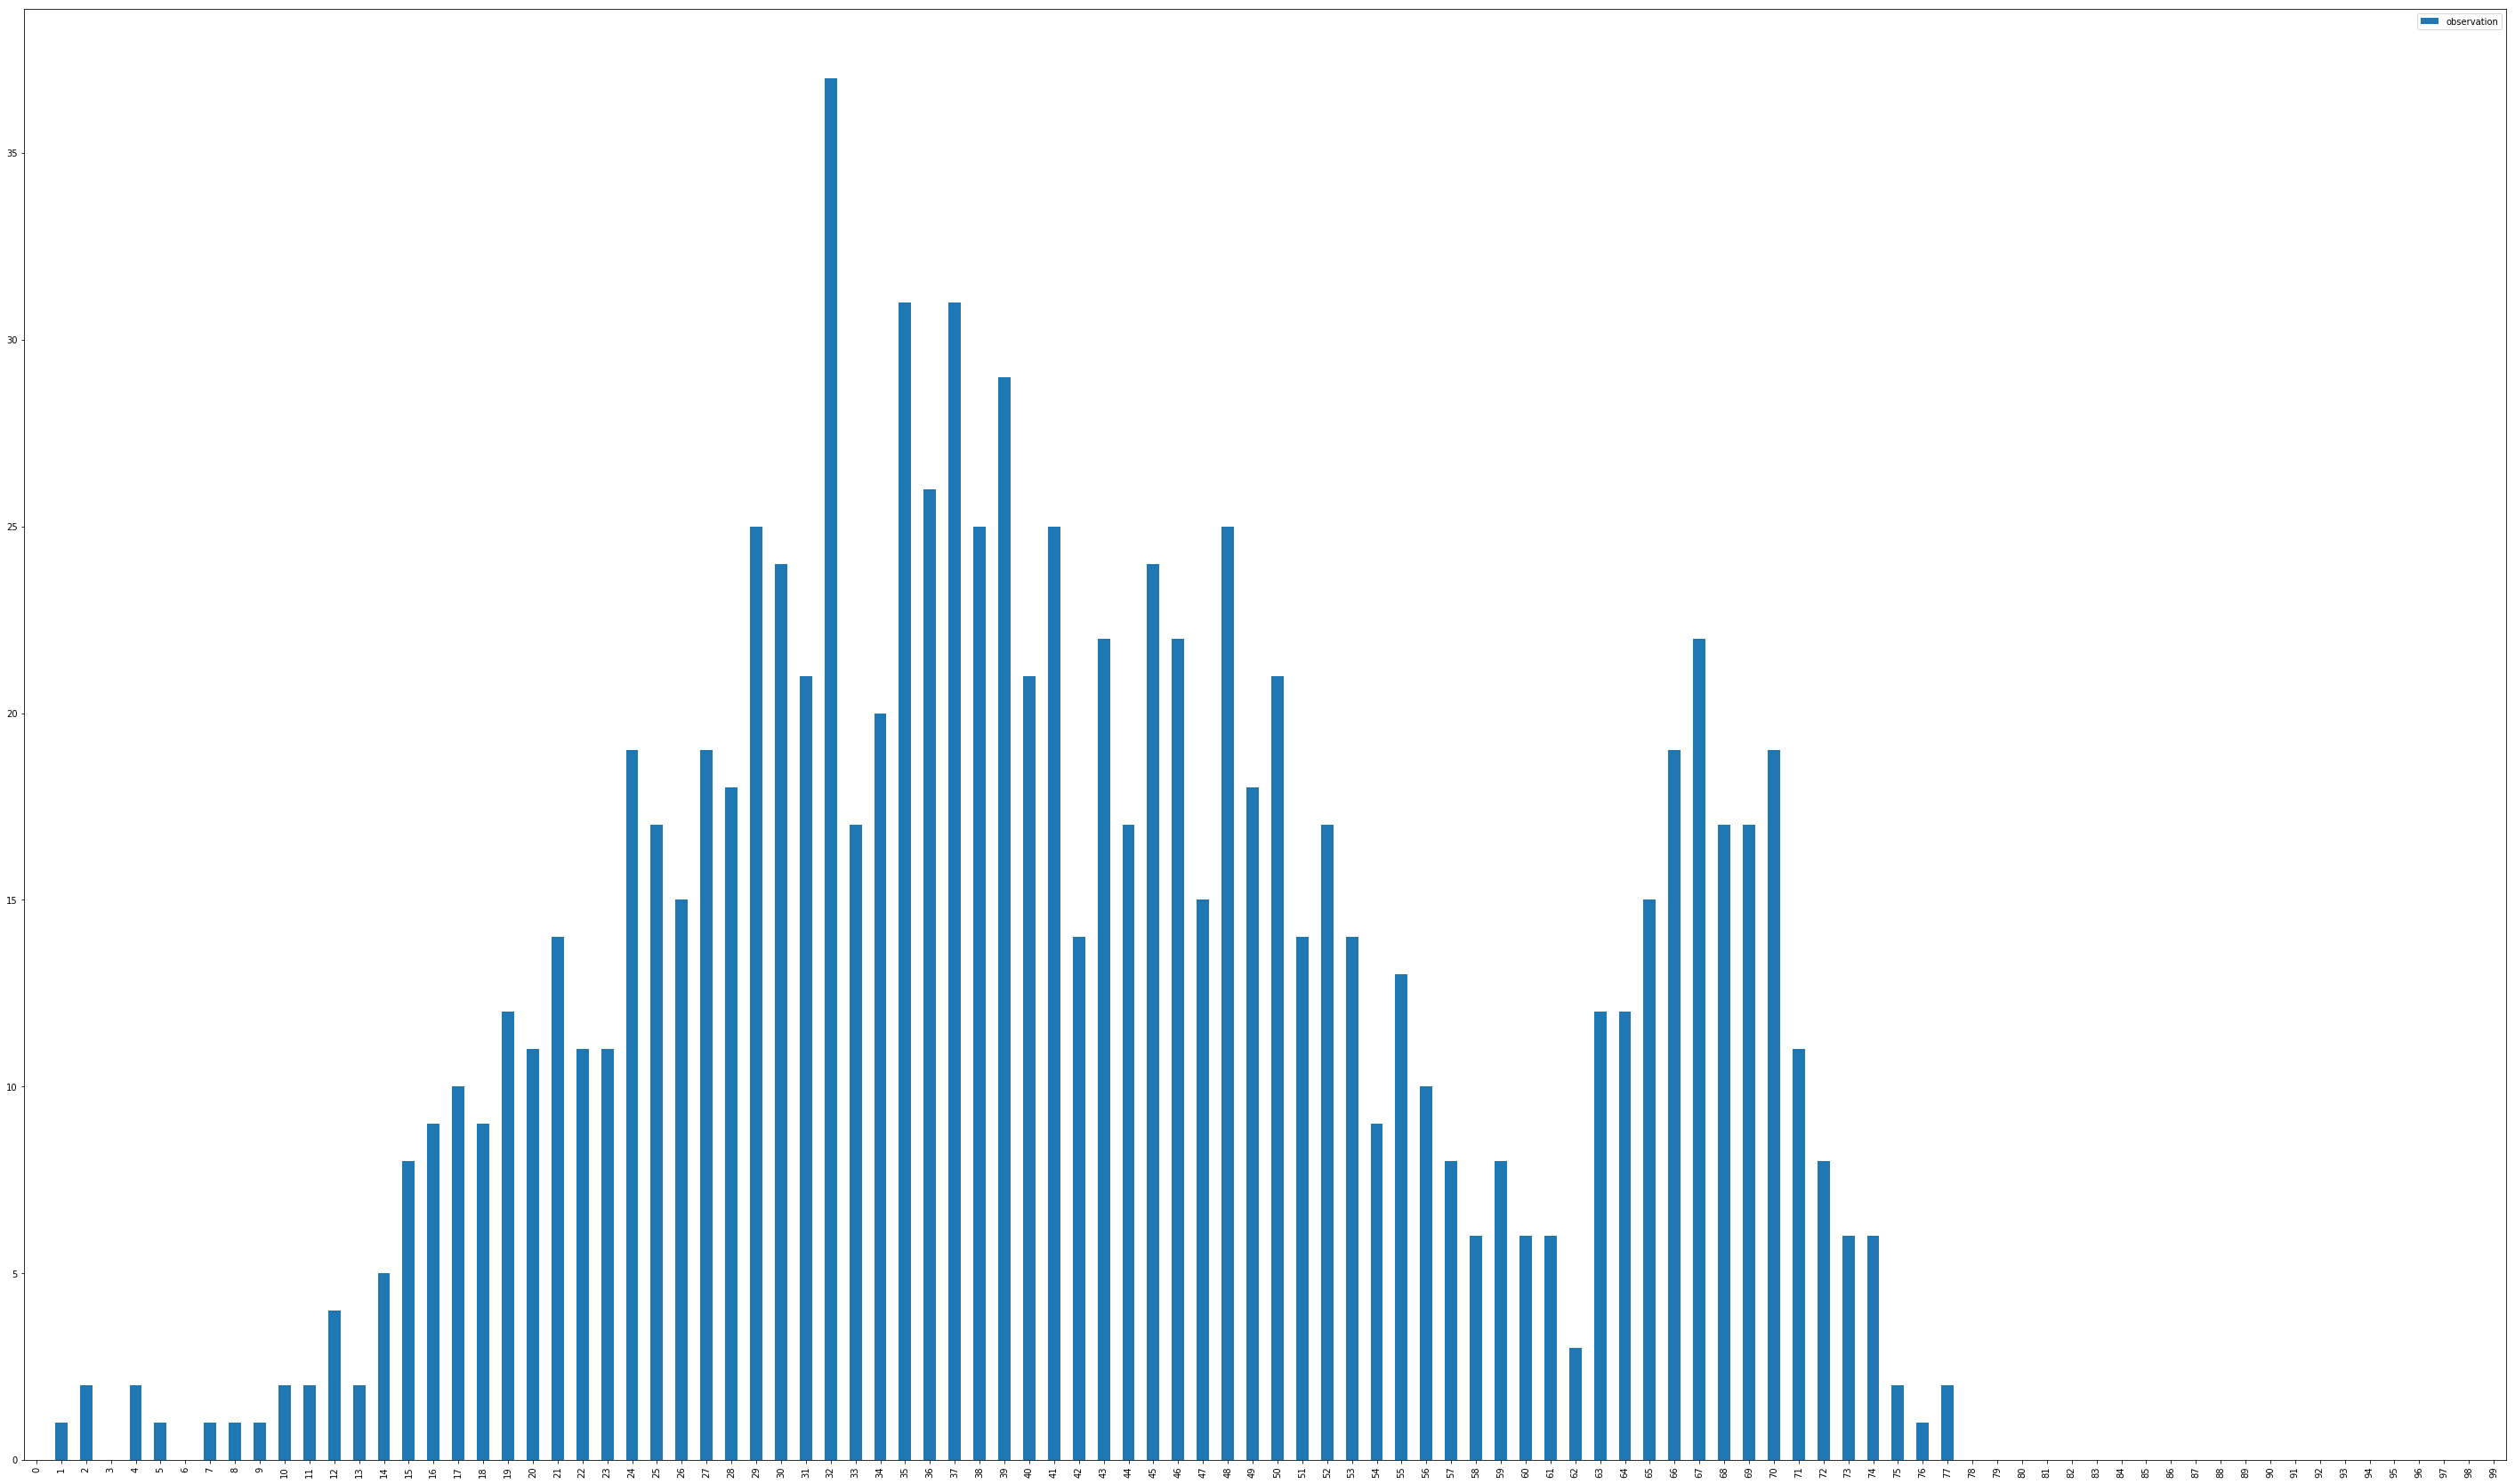

In [283]:
list_to_100.merge(freq_ages3, how ='left').fillna(0)[['observation']].plot(kind = 'bar', figsize = (50, 30))

In [284]:
age_popu3.mean()

observation    41.989
dtype: float64

In [285]:
age_popu3.std()

observation    16.144706
dtype: float64

In [288]:
def median2(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='observation')
    for count, i in enumerate(df['observation']):
        if count == (len(df.index)/2):
            value_up = i
        if count == (len(df.index)/2)-1:
            value_down = i
    return (value_up + value_down)/2

In [289]:
median2(age_popu3)

40.0

Few difference between median and mean

In [291]:
def quartile75_2(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='observation')
    for count, i in enumerate(df['observation']):
        if count == round(len(df.index)*3/4):
            value_up = i
            print((len(df.index)*3/4), count, value_up)
        if count == round((len(df.index)*3/4)-1):
            value_down = i
            print((len(df.index)*3/4)-1, count, value_down)
    return (value_up + value_down)/2

In [292]:
quartile75_2(age_popu3)

749.0 749 53.0
750.0 750 53.0


53.0

In [296]:
def quartile25_2(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='observation')
    for count, i in enumerate(df['observation']):
        if count == round(len(df.index)*1/4):
            value_up = i
            print((len(df.index)*1/4), count, value_up)
        if count == round((len(df.index)*1/4)-1):
            value_down = i
            print((len(df.index)*1/4)-1, count, value_down)
    return (value_up + value_down)/2

In [294]:
quartile25_2(age_popu3)

249.0 249 30.0
250.0 250 30.0


30.0

In [297]:
def quartile80_2(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='observation')
    for count, i in enumerate(df['observation']):
        if count == round(len(df.index)*4/5):
            value_up = i
            print((len(df.index)*4/5), count, value_up)
        if count == round((len(df.index)*4/5)-1):
            value_down = i
            print((len(df.index)*4/5)-1, count, value_down)
    return (value_up + value_down)/2

In [298]:
quartile80_2(age_popu3)

799.0 799 57.0
800.0 800 57.0


57.0

In [299]:
def quartile90_2(df):
    value_up = 0
    value_down = 0
    df = df.sort_values(by='observation')
    for count, i in enumerate(df['observation']):
        if count == round(len(df.index)*9/10):
            value_up = i
            print((len(df.index)*9/10), count, value_up)
        if count == round((len(df.index)*9/10)-1):
            value_down = i
            print((len(df.index)*9/10)-1, count, value_down)
    return (value_up + value_down)/2

In [300]:
quartile90_2(age_popu3)

899.0 899 67.0
900.0 900 67.0


67.0